CÁC PHƯƠNG PHÁP THỬ NGHIỆM
- Mạng Neural Feedforward.
- Mạng Neural Recurrent (RNN).
- Các thuật toán khác: Hồi quy tuyến tính (Linear Regression), SVM, Cây quyết định (Decision Tree), Rừng ngẫu nhiên (Random Forest),v.v.

In [1]:
import pandas as pd

# Đọc dữ liệu
data = pd.read_csv('data_src_2.csv')
data.head()

Date  Adj Close      Close       High        Low       Open  \
0  2019-12-23  68.833260  71.000000  71.062500  70.092499  70.132500   
1  2019-12-24  68.898697  71.067497  71.222504  70.730003  71.172501   
2  2019-12-26  70.265671  72.477501  72.495003  71.175003  71.205002   
3  2019-12-27  70.239014  72.449997  73.492500  72.029999  72.779999   
4  2019-12-30  70.655884  72.879997  73.172501  71.305000  72.364998   

        Volume    Industry Ticker        GDP  
0   98572000.0  Technology   AAPL  21727.657  
1   48478800.0  Technology   AAPL  21727.657  
2   93121200.0  Technology   AAPL  21727.657  
3  146266000.0  Technology   AAPL  21727.657  
4  144114400.0  Technology   AAPL  21727.657

In [2]:
print(data.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Industry', 'Ticker', 'GDP'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6816 non-null   object 
 1   Adj Close  6816 non-null   float64
 2   Close      6816 non-null   float64
 3   High       6816 non-null   float64
 4   Low        6816 non-null   float64
 5   Open       6816 non-null   float64
 6   Volume     6816 non-null   float64
 7   Industry   6816 non-null   object 
 8   Ticker     6816 non-null   object 
 9   GDP        6816 non-null   float64
dtypes: float64(7), object(3)
memory usage: 532.6+ KB


In [4]:
data.describe()

Adj Close        Close         High          Low         Open  \
count  6816.000000  6816.000000  6816.000000  6816.000000  6816.000000   
mean    151.077472   152.968592   155.046851   150.769203   152.935008   
std      93.278955    93.808847    95.013301    92.532082    93.828935   
min       3.268044     4.010000     4.420000     3.960000     4.270000   
25%     112.257439   113.430000   115.297503   111.797503   113.455000   
50%     141.527000   143.075005   144.739998   141.351662   143.240005   
75%     196.875610   199.742496   203.212498   195.327499   199.595001   
max     451.132233   452.850006   456.170013   451.769989   453.070007   

             Volume           GDP  
count  6.816000e+03   6816.000000  
mean   5.456994e+07  25545.516453  
std    6.435532e+07   2717.902622  
min    2.116000e+05  19935.444000  
25%    2.461775e+06  23368.861000  
50%    4.057095e+07  25805.791000  
75%    8.009665e+07  27967.697000  
max    9.140820e+08  29354.321000

In [5]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Industry     0
Ticker       0
GDP          0
dtype: int64

Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Lấy danh sách các mã Ticker
tickers = data['Ticker'].unique()
data['Date'] = pd.to_datetime(data['Date'])

Xu hướng giá mở cửa theo thời gian

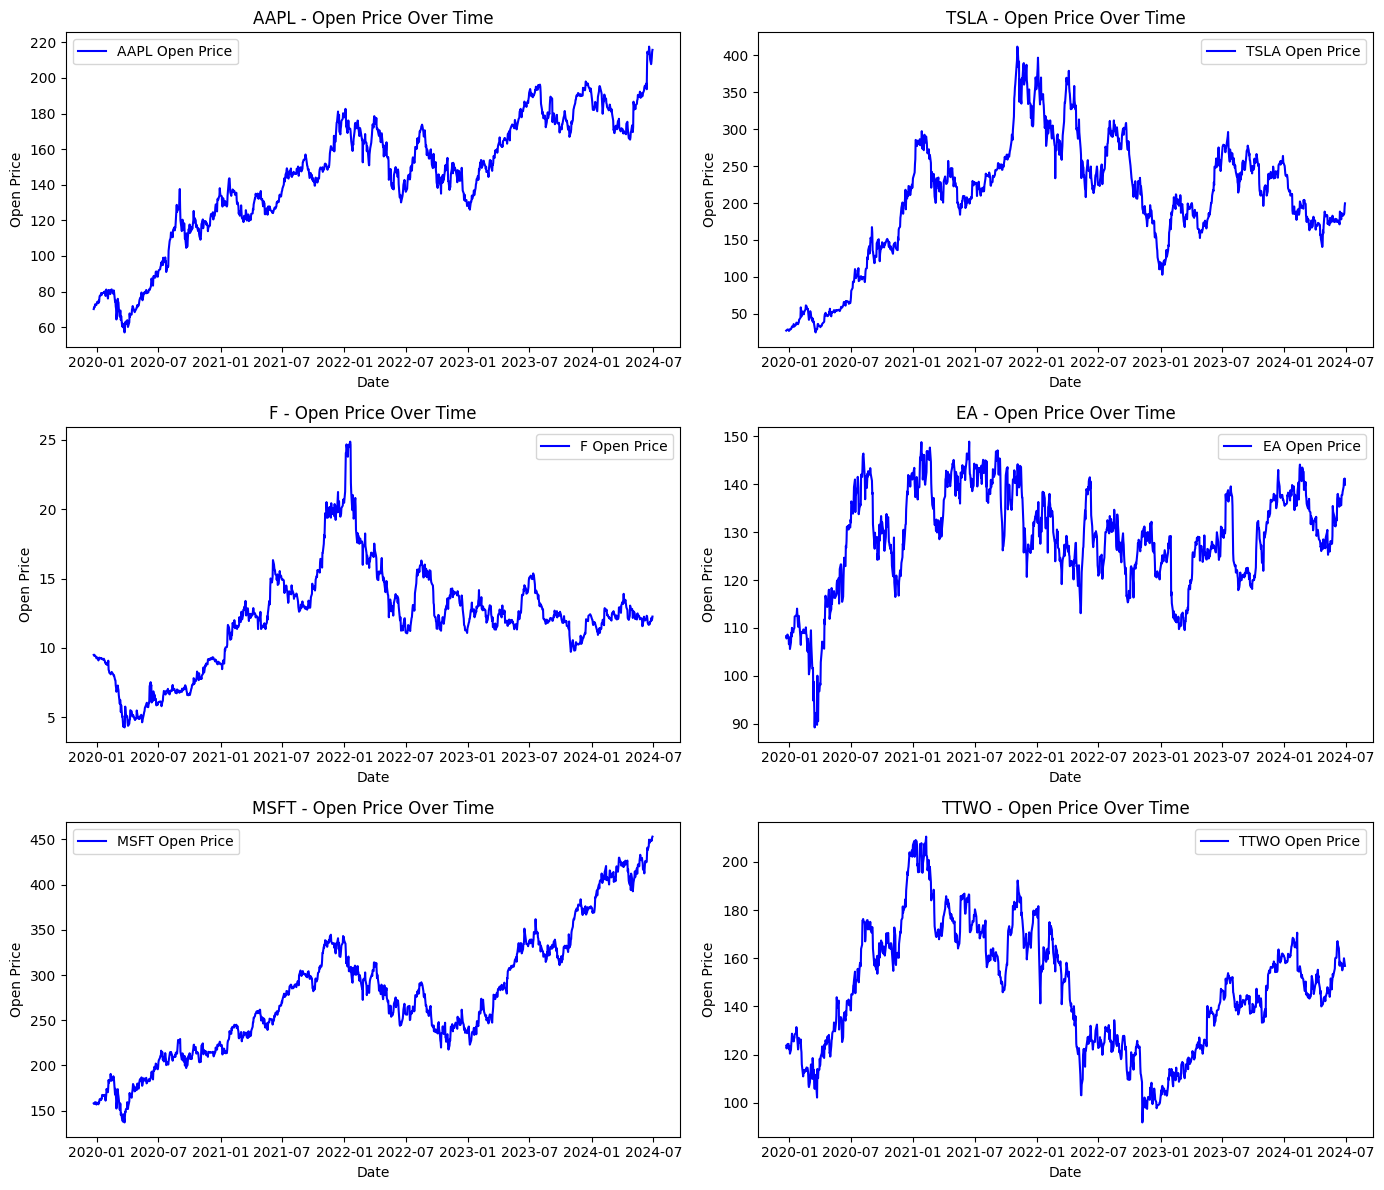

In [8]:
# Vẽ biểu đồ xu hướng giá mở cửa cho từng Ticker
plt.figure(figsize=(14, 12))
for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i + 1)
    ticker_data = data[data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Open'], label=f'{ticker} Open Price', color='blue')
    plt.title(f'{ticker} - Open Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Open Price')
    plt.legend()
plt.tight_layout()
plt.show()

Phân phối giá mở cửa

In [9]:
# Vẽ histogram giá mở cửa cho từng Ticker
plt.figure(figsize=(14, 12))
for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i + 1)
    ticker_data = data[data['Ticker'] == ticker]
    sns.histplot(ticker_data['Open'], bins=30, kde=True, color='blue')
    plt.title(f'{ticker} - Distribution of Open Prices')
    plt.xlabel('Open Price')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

So sánh khối lượng giao dịch giữa các ngành

In [10]:
# Tính tổng khối lượng giao dịch theo ngành cho từng Ticker
industry_volume_by_ticker = data.groupby(['Ticker', 'Industry'])['Volume'].sum().unstack()

# Vẽ biểu đồ cột nhóm
industry_volume_by_ticker.plot(kind='bar', figsize=(14, 8), colormap='viridis')

# Thêm tiêu đề và nhãn
plt.title('Total Trading Volume by Industry for Each Ticker', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Mối tương quan giữa các cột số

In [11]:
# Vẽ heatmap tương quan cho từng Ticker
plt.figure(figsize=(14, 12))
for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i + 1)
    ticker_data = data[data['Ticker'] == ticker]
    corr_matrix = ticker_data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'GDP']].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
    plt.title(f'{ticker} - Correlation Matrix')
plt.tight_layout()
plt.show()

Tăng trưởng giá cổ phiếu theo thời gian

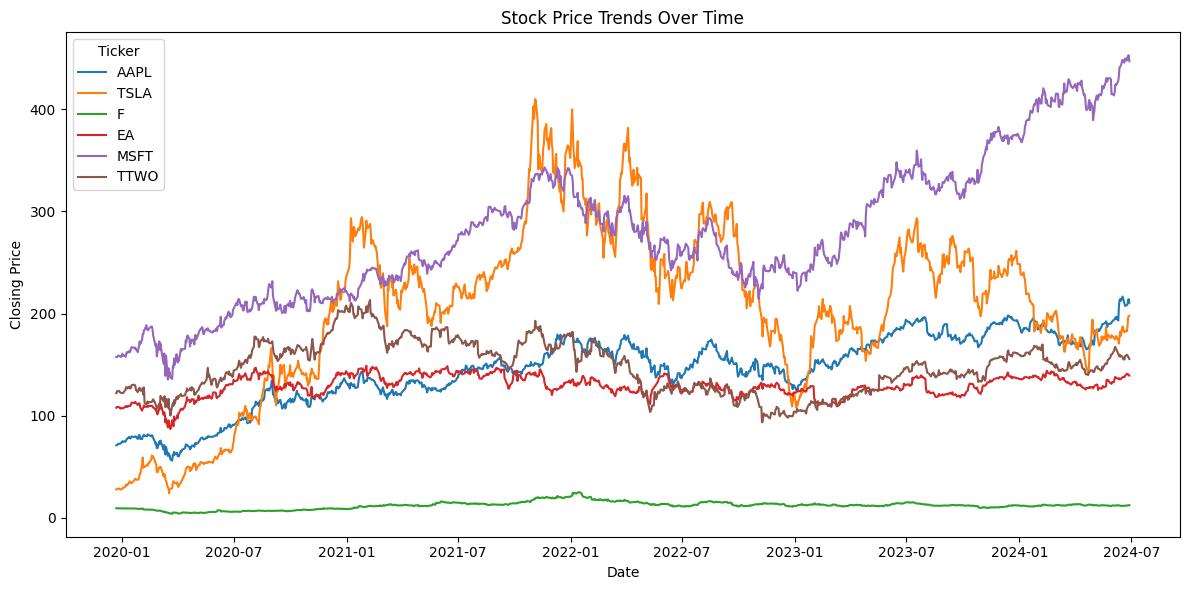

In [12]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker)
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()

Tỷ lệ thay đổi giá cổ phiếu hằng ngày (Daily Returns)

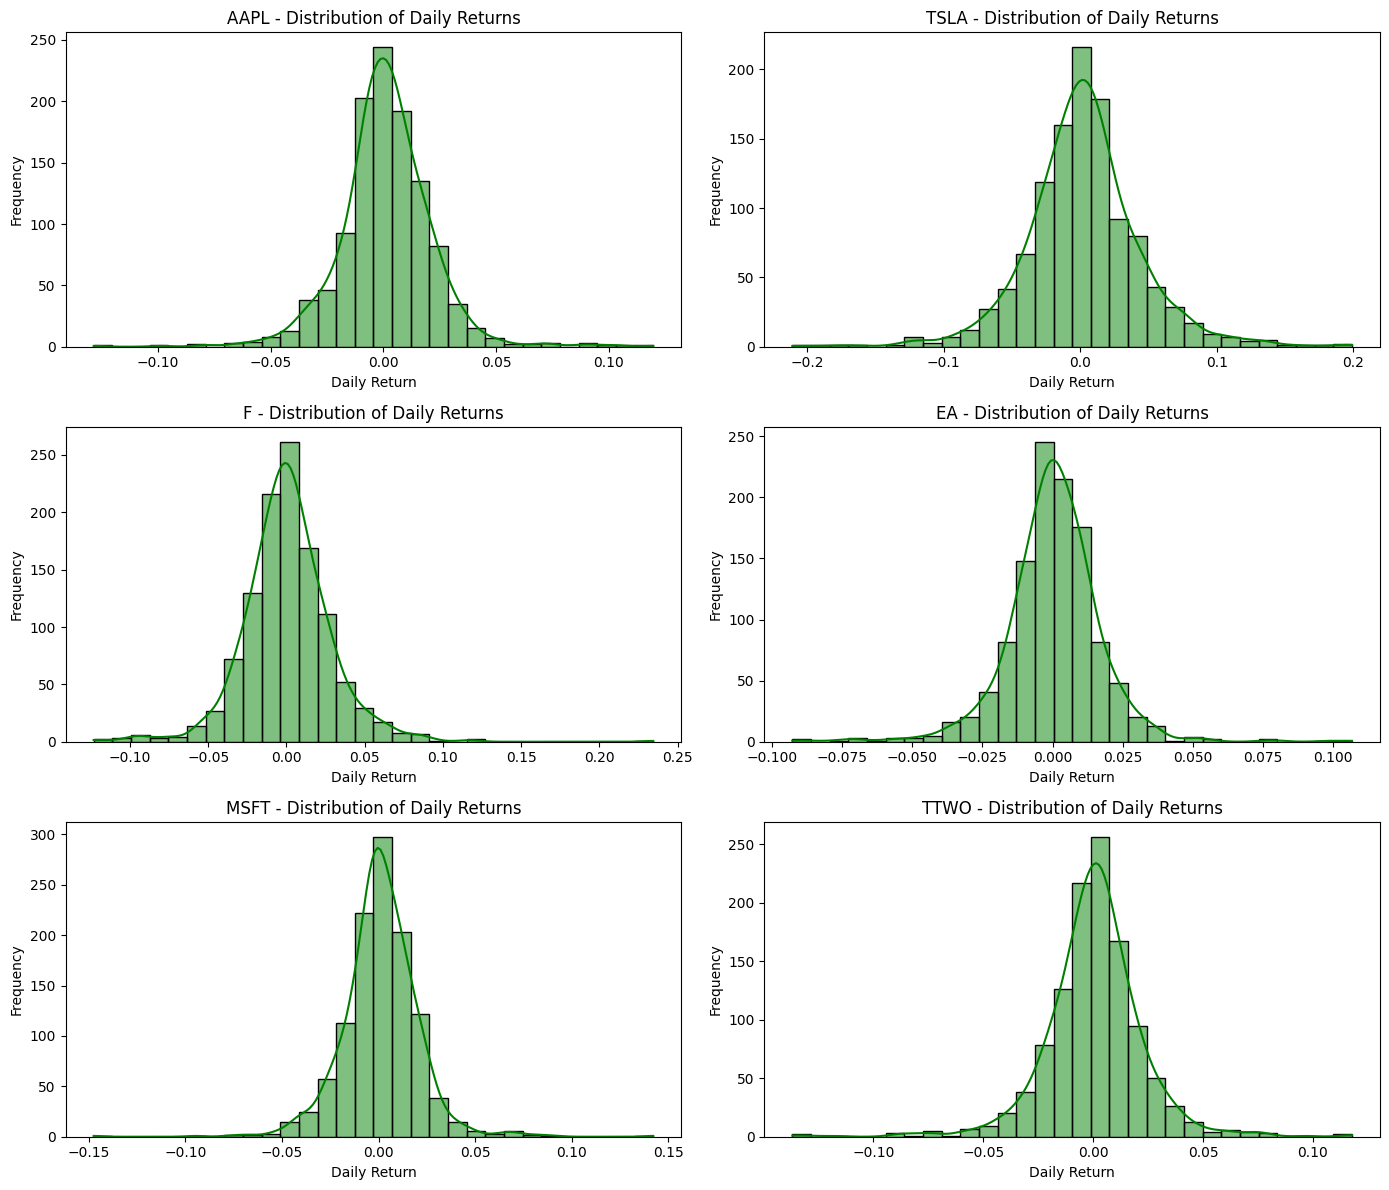

In [13]:
# Tính tỷ lệ thay đổi giá đóng cửa
data['Daily Return'] = data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 12))
for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i + 1)
    ticker_data = data[data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=30, kde=True, color='green')
    plt.title(f'{ticker} - Distribution of Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Khối lượng giao dịch theo thời gian

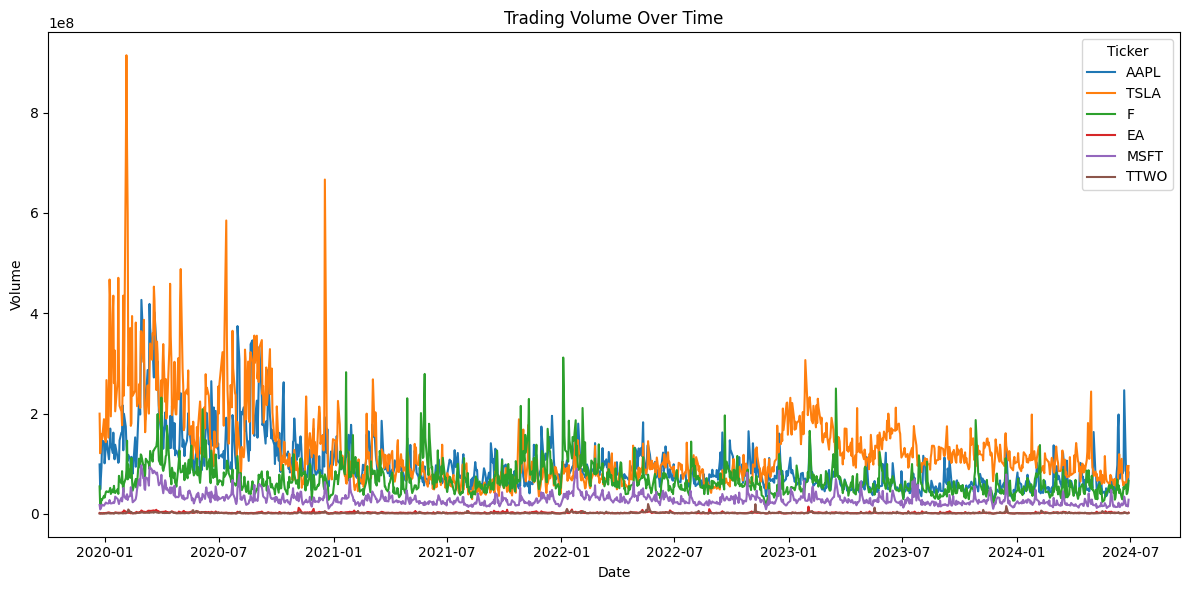

In [14]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Volume'], label=ticker)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()


Boxplot giá cổ phiếu theo ngành

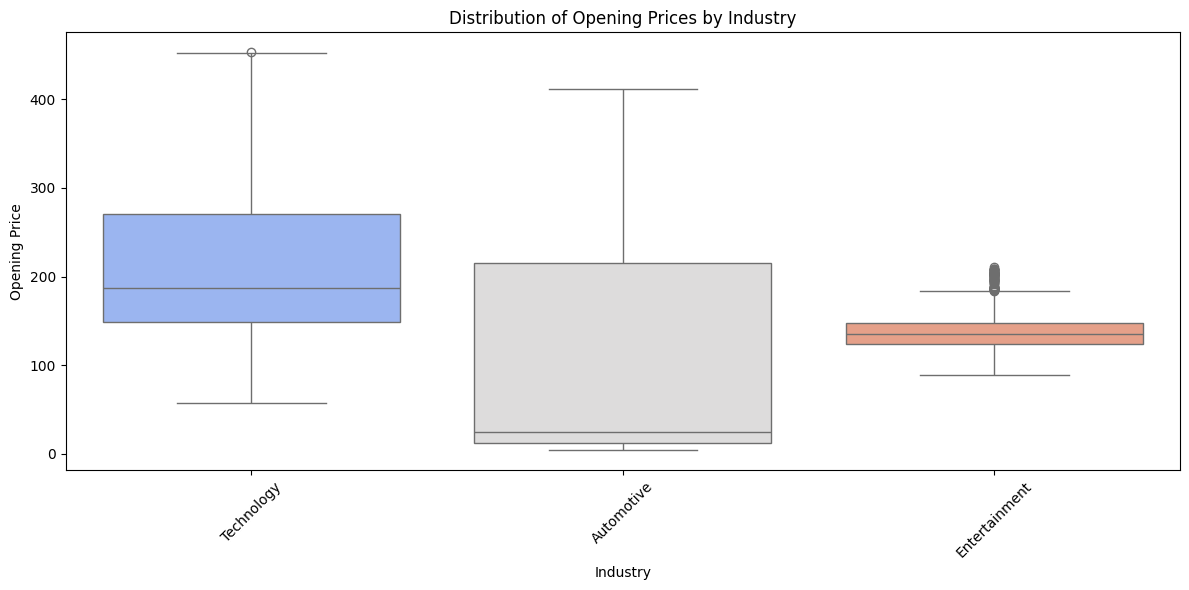

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Industry', y='Open', hue='Industry', palette='coolwarm', dodge=False)
plt.title('Distribution of Opening Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('Opening Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mối quan hệ giữa giá cổ phiếu và GDP

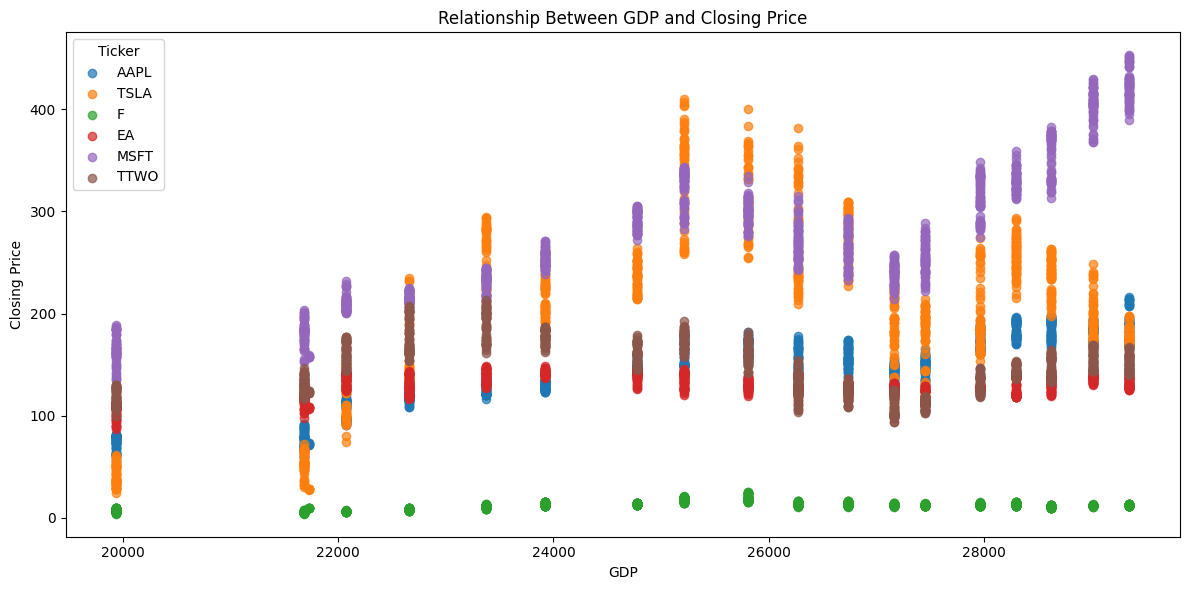

In [16]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.scatter(ticker_data['GDP'], ticker_data['Close'], label=ticker, alpha=0.7)
plt.title('Relationship Between GDP and Closing Price')
plt.xlabel('GDP')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()

Tiền xử lý dữ liệu

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def prepare_data(ticker_data, sequence_length=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(ticker_data['Open'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    split = int(0.8 * len(X))
    X_train, X_eval = X[:split], X[split:]
    y_train, y_eval = y[:split], y[split:]

    return X, y, scaler, X_train, X_eval, y_train, y_eval

THỬ NGHIỆM CÁC PHƯƠNG PHÁP

Mạng Neural Feedforward.

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Lưu kết quả cho từng mã cổ phiếu
results_fnn = {}

# Hàm xây dựng mô hình Feedforward Neural Network
def build_ffnn_model(input_shape):
    model_fnn = Sequential()
    model_fnn.add(Input(shape=(input_shape,)))  # Lớp Input cho hình dạng đầu vào
    model_fnn.add(Dense(50, activation='relu'))
    model_fnn.add(Dense(50, activation='relu'))
    model_fnn.add(Dense(1))  # Output layer
    model_fnn.compile(optimizer='adam', loss='mean_squared_error')
    return model_fnn

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_fnn = data[data['Ticker'] == ticker].sort_values('Date')
    X_fnn, y_fnn, scaler_fnn, X_train_fnn, X_eval_fnn, y_train_fnn, y_eval_fnn = prepare_data(ticker_data_fnn)

    # Xây dựng và huấn luyện mô hình Feedforward Neural Network
    model_fnn = build_ffnn_model(X_train_fnn.shape[1])
    history_fnn = model_fnn.fit(X_train_fnn, y_train_fnn, epochs=10, batch_size=32, verbose=0, validation_data=(X_eval_fnn, y_eval_fnn))

    # Dự đoán trên dữ liệu huấn luyện
    train_predictions_fnn = model_fnn.predict(X_train_fnn)
    train_predictions_fnn = scaler_fnn.inverse_transform(train_predictions_fnn)
    y_train_actual_fnn = scaler_fnn.inverse_transform(y_train_fnn.reshape(-1, 1))

    # Dự đoán trên dữ liệu kiểm tra
    test_predictions_fnn = model_fnn.predict(X_eval_fnn)
    test_predictions_fnn = scaler_fnn.inverse_transform(test_predictions_fnn)
    y_eval_actual_fnn = scaler_fnn.inverse_transform(y_eval_fnn.reshape(-1, 1))

    # Tính MSE và R² cho dữ liệu huấn luyện
    train_mse_fnn = mean_squared_error(y_train_actual_fnn, train_predictions_fnn)
    train_r2_fnn = r2_score(y_train_actual_fnn, train_predictions_fnn)

    # Tính MSE và R² cho dữ liệu kiểm tra
    test_mse_fnn = mean_squared_error(y_eval_actual_fnn, test_predictions_fnn)
    test_r2_fnn = r2_score(y_eval_actual_fnn, test_predictions_fnn)

    # Lưu kết quả
    results_fnn[ticker] = {
        'dates': ticker_data.iloc[:len(y_train_fnn) + len(y_eval_fnn)]['Date'].values,
        'actual': np.concatenate([y_train_actual_fnn, y_eval_actual_fnn], axis=0),
        'predicted': np.concatenate([train_predictions_fnn, test_predictions_fnn], axis=0),
        'train_mse_fnn': train_mse_fnn,
        'train_r2_fnn': train_r2_fnn,
        'test_mse_fnn': test_mse_fnn,
        'test_r2_fnn': test_r2_fnn,
        'history_fnn': history_fnn
    }

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


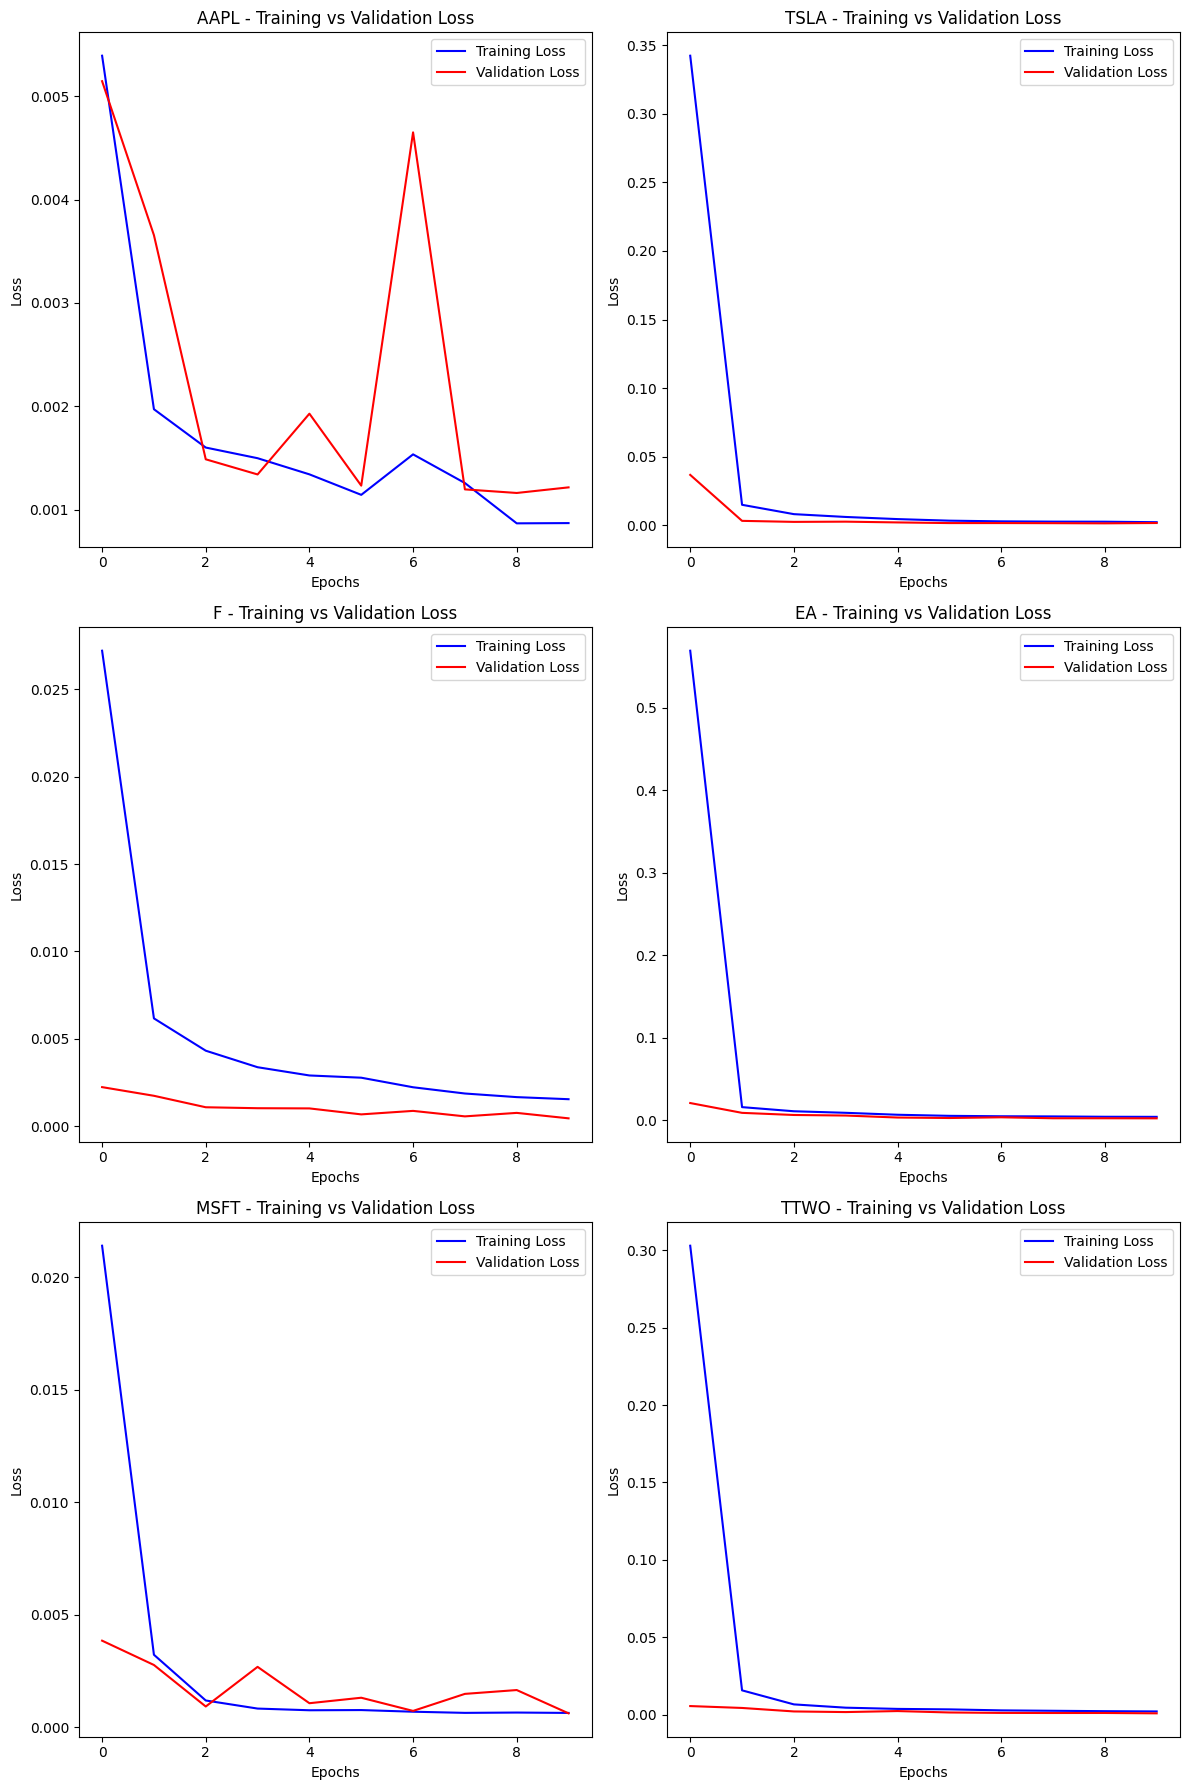

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử có số lượng ticker (có thể tính n từ results_fnn)
n = len(results_fnn)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_fnn.items()):
    # Vẽ đồ thị huấn luyện và kiểm tra loss
    history = result['history_fnn']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(history.history['loss'], color='blue', label='Training Loss')
    ax.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax.set_title(f'{ticker} - Training vs Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

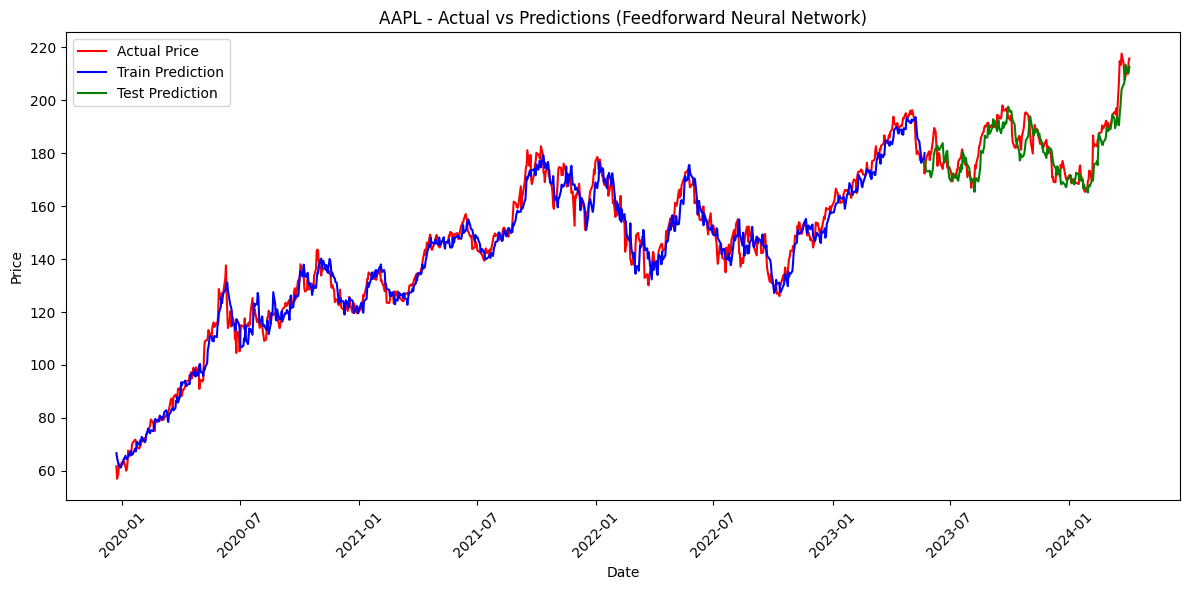

AAPL - Train MSE: 20.34960403770486, Train R²: 0.975474815653167
AAPL - Test MSE: 31.318228788305234, Test R²: 0.7491283658396448


TSLA - Train MSE: 307.2092664768174, Train R²: 0.9541217091821182
TSLA - Test MSE: 225.4246093957982, Test R²: 0.8048912682394551


F - Train MSE: 0.5746693043561464, Train R²: 0.9638505185764612
F - Test MSE: 0.18809675128792427, Test R²: 0.7050466038014371


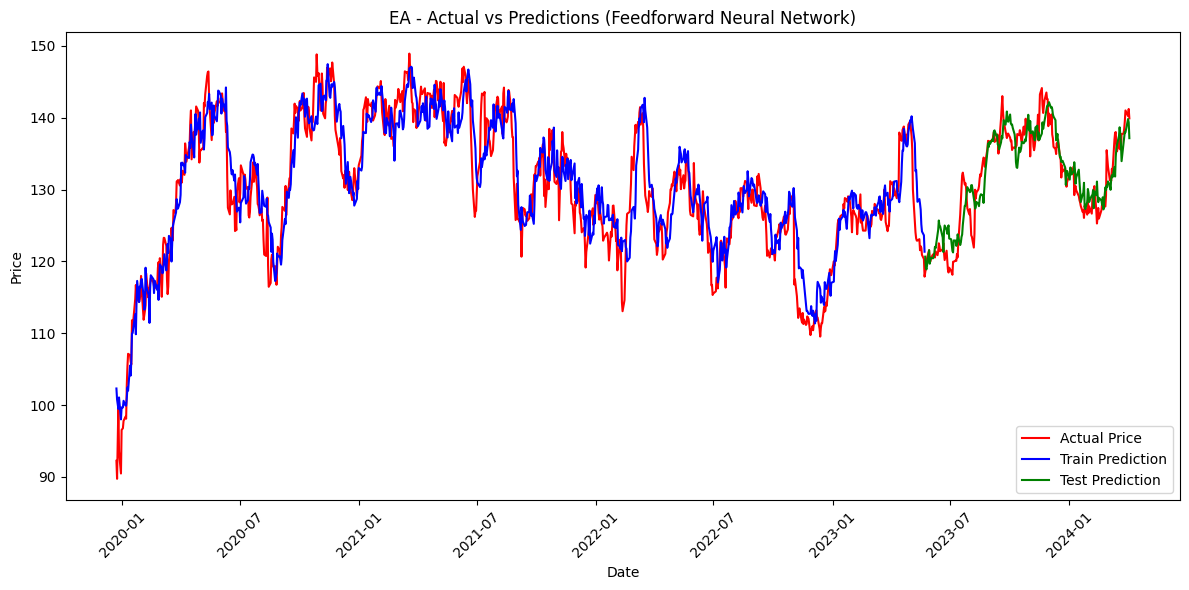

EA - Train MSE: 13.867493473977355, Train R²: 0.8596669131481727
EA - Test MSE: 7.838997355019304, Test R²: 0.8268600493521392


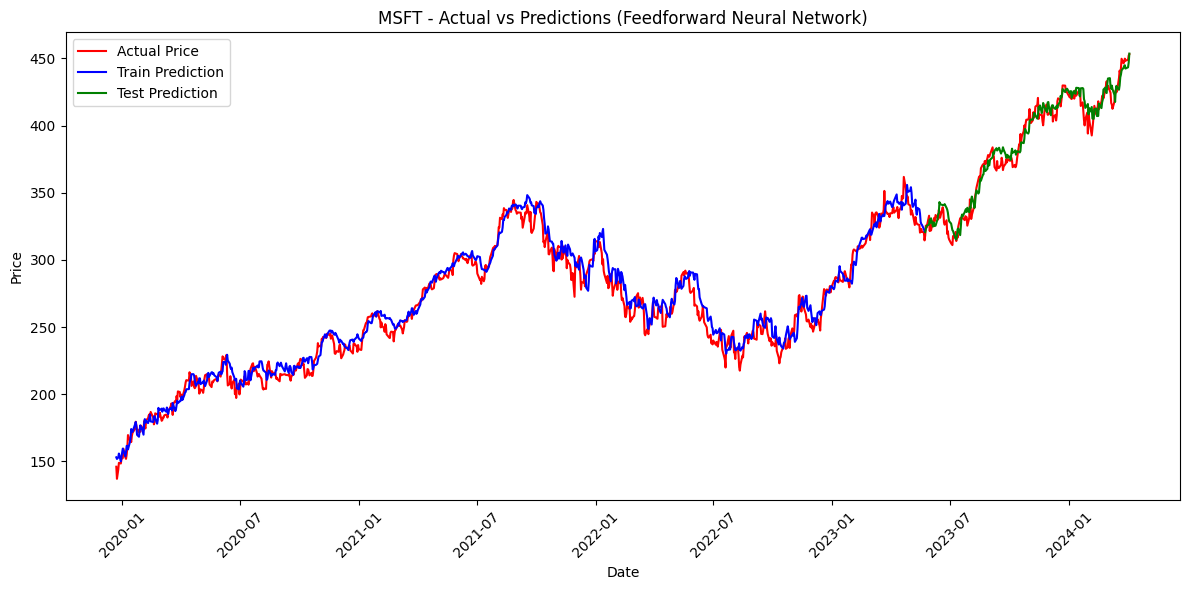

MSFT - Train MSE: 68.71019700163282, Train R²: 0.9671371533920409
MSFT - Test MSE: 61.248807195138546, Test R²: 0.9591919997380973


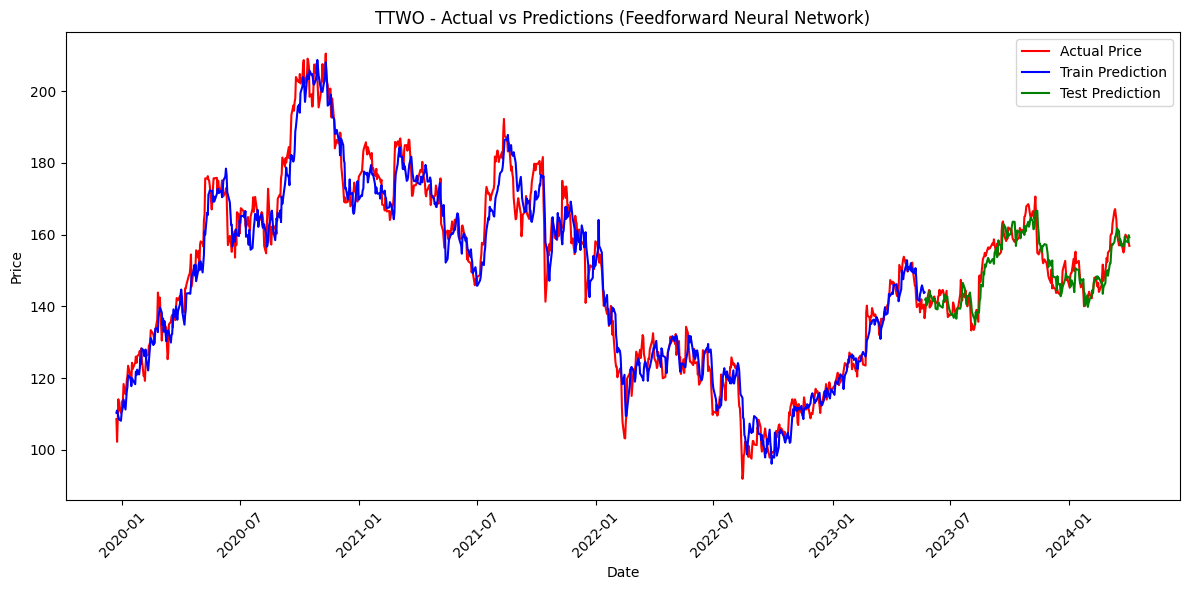

TTWO - Train MSE: 28.91233286634555, Train R²: 0.9622185574297584
TTWO - Test MSE: 13.056418627687014, Test R²: 0.8317875449148354


In [21]:
# Vẽ biểu đồ kết quả
for ticker, result in results_fnn.items():
    plt.figure(figsize=(12, 6))

    # Vẽ đồ thị actual price (màu đỏ)
    plt.plot(result['dates'], result['actual'], color='red', label='Actual Price')

    # Vẽ đồ thị train và test predictions (màu xanh dương cho train, xanh lá cho test)
    plt.plot(result['dates'][:len(result['actual']) - len(test_predictions_fnn)], result['predicted'][:len(result['actual']) - len(test_predictions_fnn)], color='blue', label='Train Prediction')
    plt.plot(result['dates'][len(result['actual']) - len(test_predictions_fnn):], result['predicted'][len(result['actual']) - len(test_predictions_fnn):], color='green', label='Test Prediction')

    plt.title(f'{ticker} - Actual vs Predictions (Feedforward Neural Network)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # In ra MSE và R²
    print(f'{ticker} - Train MSE: {result["train_mse_fnn"]}, Train R²: {result["train_r2_fnn"]}')
    print(f'{ticker} - Test MSE: {result["test_mse_fnn"]}, Test R²: {result["test_r2_fnn"]}')

Mạng Neural Recurrent (RNN).

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Lưu kết quả cho từng mã cổ phiếu
results_rnn = {}

# Hàm xây dựng mô hình RNN
def build_rnn_model(input_shape):
    model_rnn = Sequential()
    model_rnn.add(Input(shape=input_shape))
    model_rnn.add(LSTM(50, return_sequences=True))
    model_rnn.add(LSTM(50))
    model_rnn.add(Dense(1))
    model_rnn.compile(optimizer='adam', loss='mean_squared_error')
    return model_rnn

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_rnn = data[data['Ticker'] == ticker].sort_values('Date')
    X_rnn, y_rnn, scaler_rnn, X_train_rnn, X_eval_rnn, y_train_rnn, y_eval_rnn = prepare_data(ticker_data_rnn)

    # Xây dựng và huấn luyện mô hình
    model_rnn = build_rnn_model((X_train_rnn.shape[1], 1))
    history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32, verbose=0, validation_data=(X_eval_rnn, y_eval_rnn))

    # Dự đoán trên dữ liệu huấn luyện
    train_predictions_rnn = model_rnn.predict(X_train_rnn)
    train_predictions_rnn = scaler_rnn.inverse_transform(train_predictions_rnn)
    y_train_actual_rnn = scaler_rnn.inverse_transform(y_train_rnn.reshape(-1, 1))

    # Dự đoán trên dữ liệu kiểm tra
    test_predictions_rnn = model_rnn.predict(X_eval_rnn)
    test_predictions_rnn = scaler_rnn.inverse_transform(test_predictions_rnn)
    y_eval_actual_rnn = scaler_rnn.inverse_transform(y_eval_rnn.reshape(-1, 1))

    # Tính MSE và R² cho dữ liệu huấn luyện
    train_mse_rnn = mean_squared_error(y_train_actual_rnn, train_predictions_rnn)
    train_r2_rnn = r2_score(y_train_actual_rnn, train_predictions_rnn)

    # Tính MSE và R² cho dữ liệu kiểm tra
    test_mse_rnn = mean_squared_error(y_eval_actual_rnn, test_predictions_rnn)
    test_r2_rnn = r2_score(y_eval_actual_rnn, test_predictions_rnn)

    # Lưu kết quả
    results_rnn[ticker] = {
        'dates': ticker_data.iloc[:len(y_train_rnn) + len(y_eval_rnn)]['Date'].values,
        'actual': np.concatenate([y_train_actual_rnn, y_eval_actual_rnn], axis=0),
        'predicted': np.concatenate([train_predictions_rnn, test_predictions_rnn], axis=0),
        'train_mse_rnn': train_mse_rnn,
        'train_r2_rnn': train_r2_rnn,
        'test_mse_rnn': test_mse_rnn,
        'test_r2_rnn': test_r2_rnn,
        'history_rnn': history_rnn
    }

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


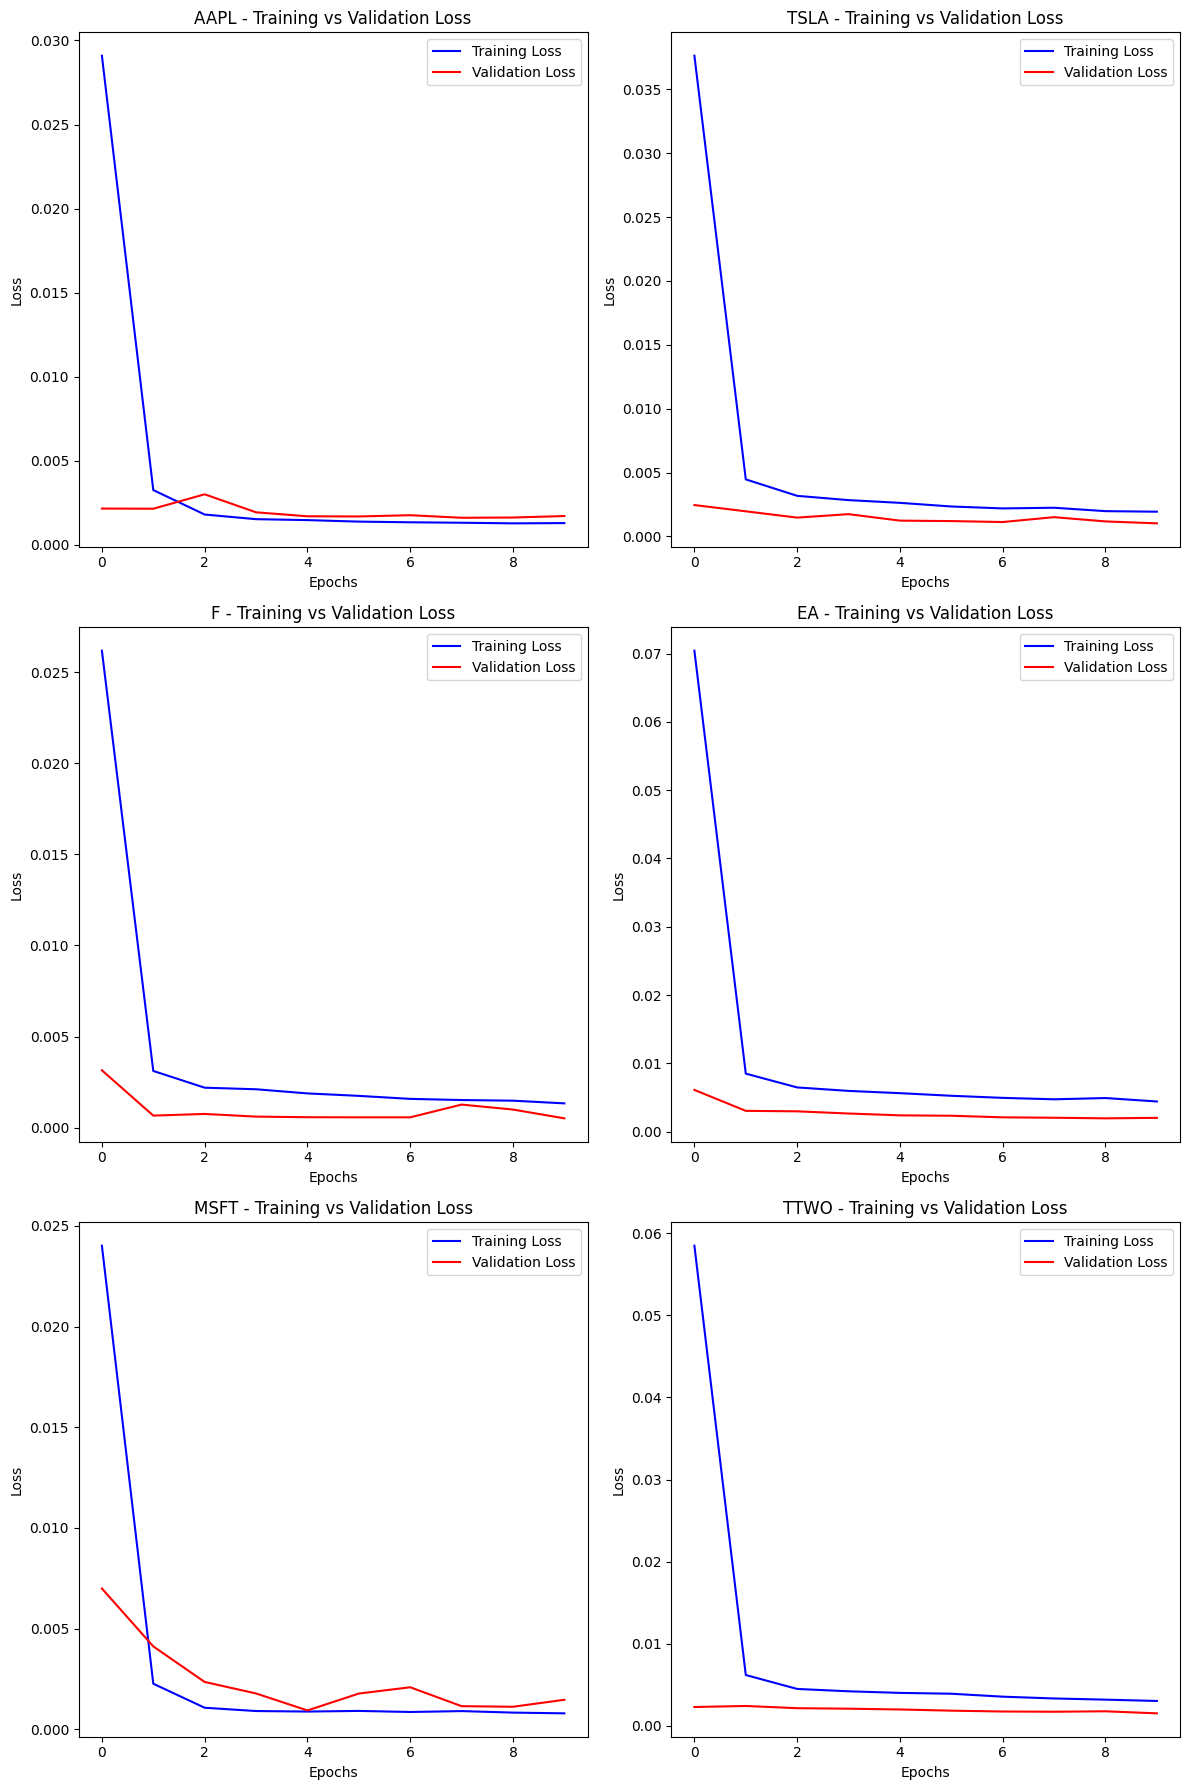

In [24]:
# Giả sử có số lượng ticker (có thể tính n từ results_fnn)
n = len(results_rnn)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_rnn.items()):
    # Vẽ đồ thị huấn luyện và kiểm tra loss
    history = result['history_rnn']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(history.history['loss'], color='blue', label='Training Loss')
    ax.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax.set_title(f'{ticker} - Training vs Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

AAPL - Train MSE: 30.66082061226934, Train R²: 0.9630478177193125
AAPL - Test MSE: 43.89285061964811, Test R²: 0.6484005772695756


TSLA - Train MSE: 267.7170990396877, Train R²: 0.9600194256263123
TSLA - Test MSE: 153.51963091073813, Test R²: 0.8671262176404625


F - Train MSE: 0.5140963954101639, Train R²: 0.9676608478042695
F - Test MSE: 0.2164616622774332, Test R²: 0.6605677556983188


EA - Train MSE: 15.80660650183726, Train R²: 0.840043920899082
EA - Test MSE: 7.201277871356134, Test R²: 0.8409453608949377


MSFT - Train MSE: 76.18267882756135, Train R²: 0.9635632002563743
MSFT - Test MSE: 146.20594830856317, Test R²: 0.9025879417070324


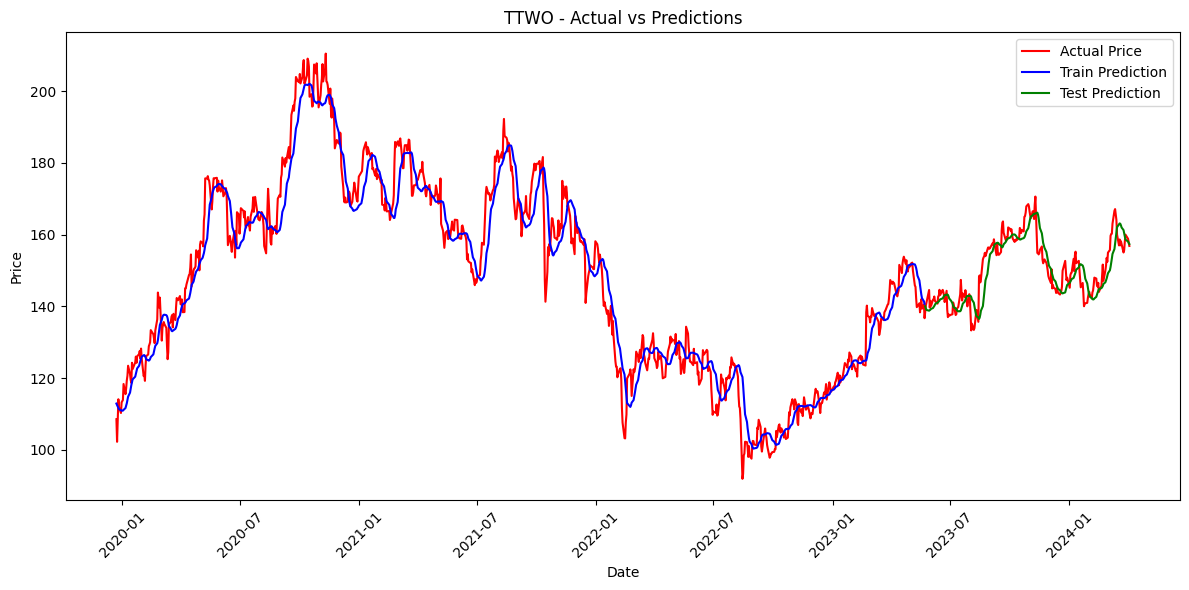

TTWO - Train MSE: 40.43541933029463, Train R²: 0.9471606639182879
TTWO - Test MSE: 21.204272438233062, Test R²: 0.7268146168685043


In [25]:
# Vẽ biểu đồ kết quả
for ticker, result in results_rnn.items():
    plt.figure(figsize=(12, 6))

    # Vẽ đồ thị actual price (màu đỏ)
    plt.plot(result['dates'], result['actual'], color='red', label='Actual Price')

    # Vẽ đồ thị train và test predictions (màu xanh dương cho train, xanh lá cho test)
    plt.plot(result['dates'][:len(result['actual']) - len(test_predictions_rnn)], result['predicted'][:len(result['actual']) - len(test_predictions_rnn)], color='blue', label='Train Prediction')
    plt.plot(result['dates'][len(result['actual']) - len(test_predictions_rnn):], result['predicted'][len(result['actual']) - len(test_predictions_rnn):], color='green', label='Test Prediction')

    plt.title(f'{ticker} - Actual vs Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # In ra MSE và R²
    print(f'{ticker} - Train MSE: {result["train_mse_rnn"]}, Train R²: {result["train_r2_rnn"]}')
    print(f'{ticker} - Test MSE: {result["test_mse_rnn"]}, Test R²: {result["test_r2_rnn"]}')

Hồi quy tuyến tính (Linear Regression)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Lưu kết quả cho từng mã cổ phiếu
results_lr = {}

# Hàm xây dựng mô hình Hồi quy tuyến tính
def build_linear_regression_model(input_shape):
    model_lr = Sequential()
    model_lr.add(Input(shape=(input_shape,)))  # Lớp Input cho hình dạng đầu vào
    model_lr.add(Dense(1))  # Chỉ có 1 lớp Dense cho Linear Regression
    model_lr.compile(optimizer='adam', loss='mean_squared_error')
    return model_lr

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_lr = data[data['Ticker'] == ticker].sort_values('Date')
    X_lr, y_lr, scaler_lr, X_train_lr, X_eval_lr, y_train_lr, y_eval_lr = prepare_data(ticker_data_lr)

    # Xây dựng và huấn luyện mô hình Hồi quy tuyến tính
    model_lr = build_linear_regression_model(X_train_lr.shape[1])
    model_lr.fit(X_train_lr, y_train_lr, epochs=10, batch_size=32, verbose=0)
    history_lr = model_lr.fit(X_train_lr, y_train_lr, epochs=10, batch_size=32, verbose=0, validation_data=(X_eval_lr, y_eval_lr))

    # Dự đoán trên dữ liệu huấn luyện
    train_predictions_lr = model_lr.predict(X_train_lr)
    train_predictions_lr = scaler_lr.inverse_transform(train_predictions_lr)
    y_train_actual_lr = scaler_lr.inverse_transform(y_train_lr.reshape(-1, 1))

    # Dự đoán trên dữ liệu kiểm tra
    test_predictions_lr = model_lr.predict(X_eval_lr)
    test_predictions_lr = scaler_lr.inverse_transform(test_predictions_lr)
    y_eval_actual_lr = scaler_lr.inverse_transform(y_eval_lr.reshape(-1, 1))

    # Tính MSE và R² cho dữ liệu huấn luyện
    train_mse_lr = mean_squared_error(y_train_actual_lr, train_predictions_lr)
    train_r2_lr = r2_score(y_train_actual_lr, train_predictions_lr)

    # Tính MSE và R² cho dữ liệu kiểm tra
    test_mse_lr = mean_squared_error(y_eval_actual_lr, test_predictions_lr)
    test_r2_lr = r2_score(y_eval_actual_lr, test_predictions_lr)

    # Lưu kết quả
    results_lr[ticker] = {
        'dates': ticker_data.iloc[:len(y_train_lr) + len(y_eval_lr)]['Date'].values,
        'actual': np.concatenate([y_train_actual_lr, y_eval_actual_lr], axis=0),
        'predicted': np.concatenate([train_predictions_lr, test_predictions_lr], axis=0),
        'train_mse_lr': train_mse_lr,
        'train_r2_lr': train_r2_lr,
        'test_mse_lr': test_mse_lr,
        'test_r2_lr': test_r2_lr,
        'history_lr': history_lr
    }

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


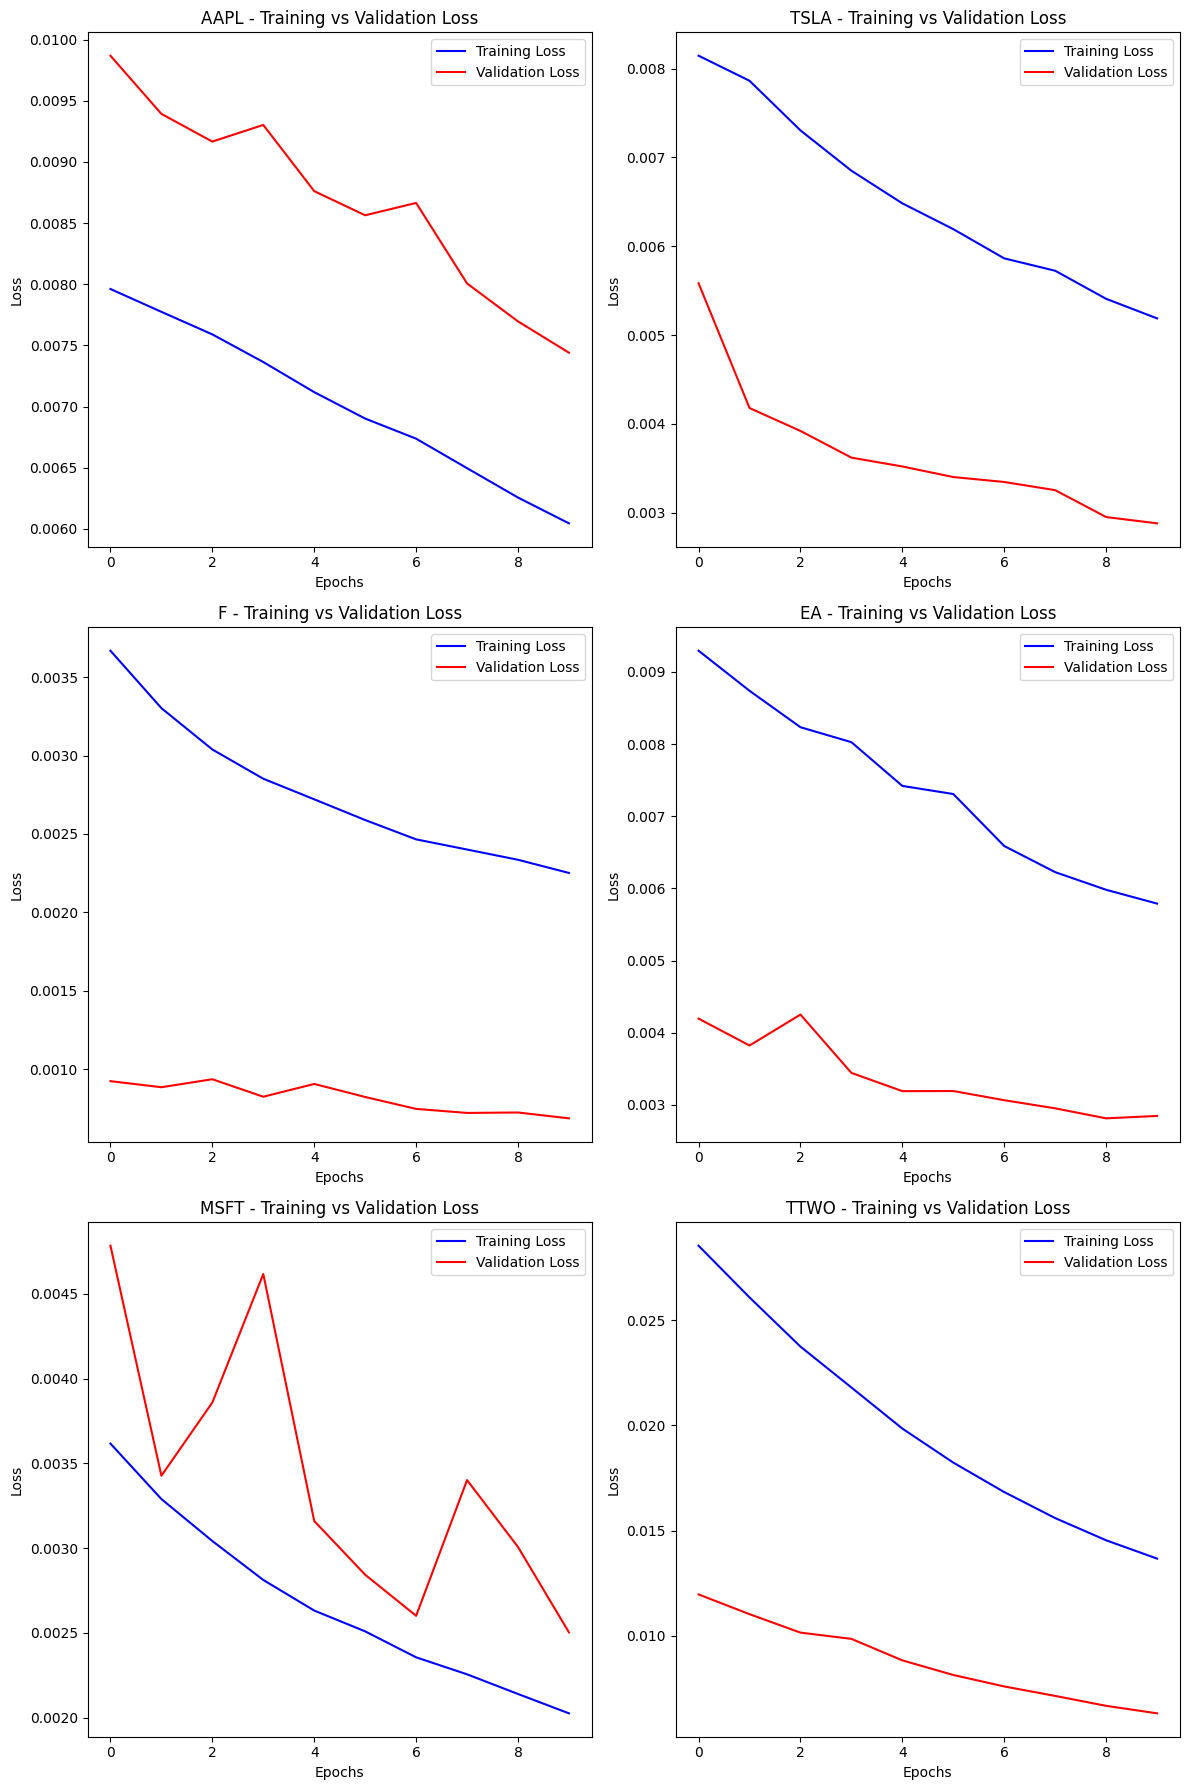

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử có số lượng ticker (có thể tính n từ results_fnn)
n = len(results_lr)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_lr.items()):
    # Vẽ đồ thị huấn luyện và kiểm tra loss
    history = result['history_lr']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(history.history['loss'], color='blue', label='Training Loss')
    ax.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax.set_title(f'{ticker} - Training vs Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

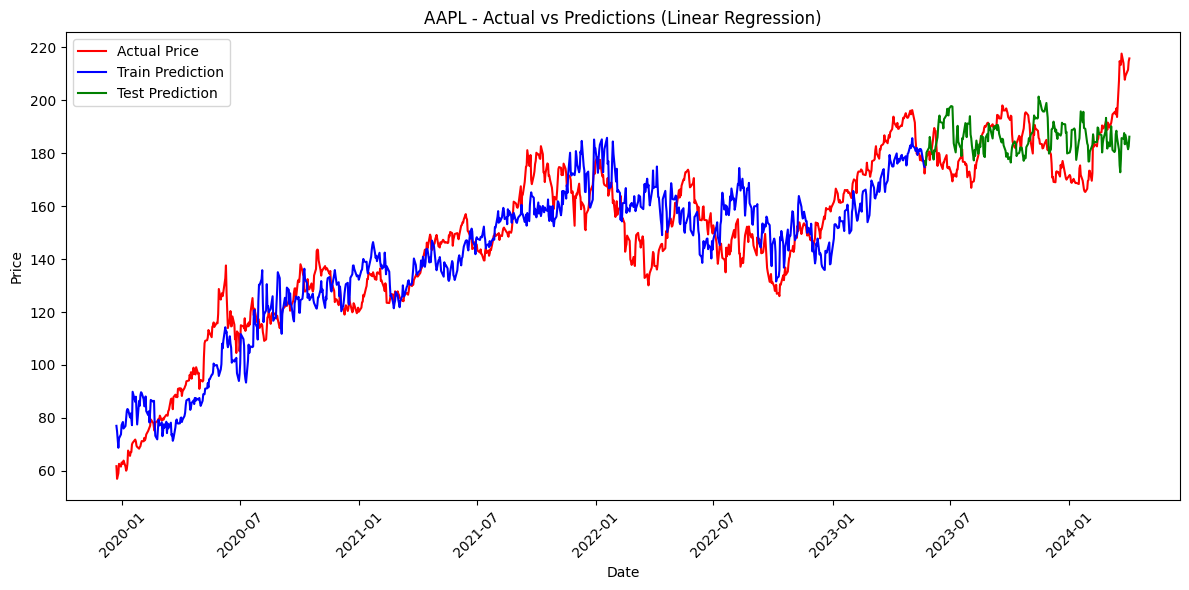

AAPL - Train MSE: 152.85983715373143, Train R²: 0.8157745144094228
AAPL - Test MSE: 191.82533172845817, Test R²: -0.5365982147125989


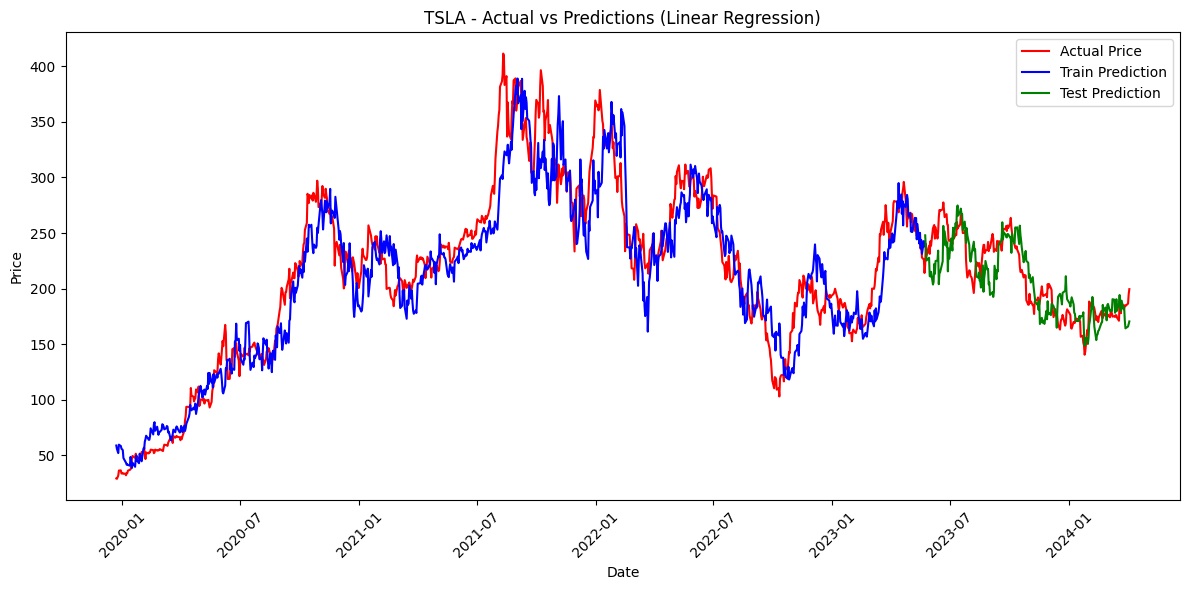

TSLA - Train MSE: 784.7060774821828, Train R²: 0.8828128655031844
TSLA - Test MSE: 430.1518688791925, Test R²: 0.62769643551166


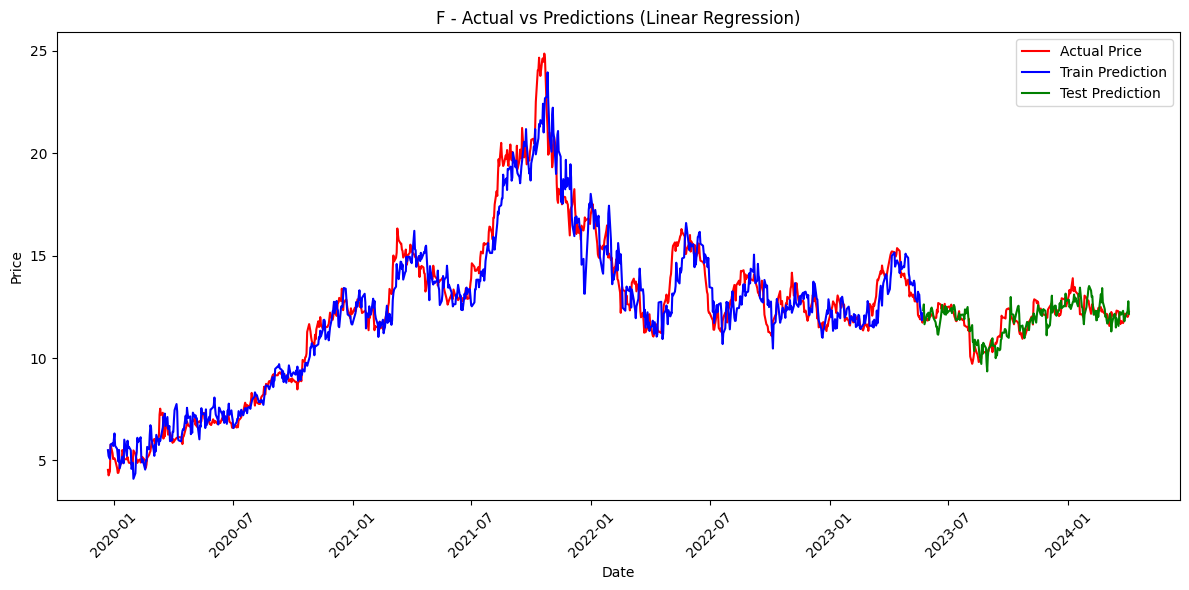

F - Train MSE: 0.936210938768806, Train R²: 0.9411077994196076
F - Test MSE: 0.2919057838148631, Test R²: 0.5422642777364923


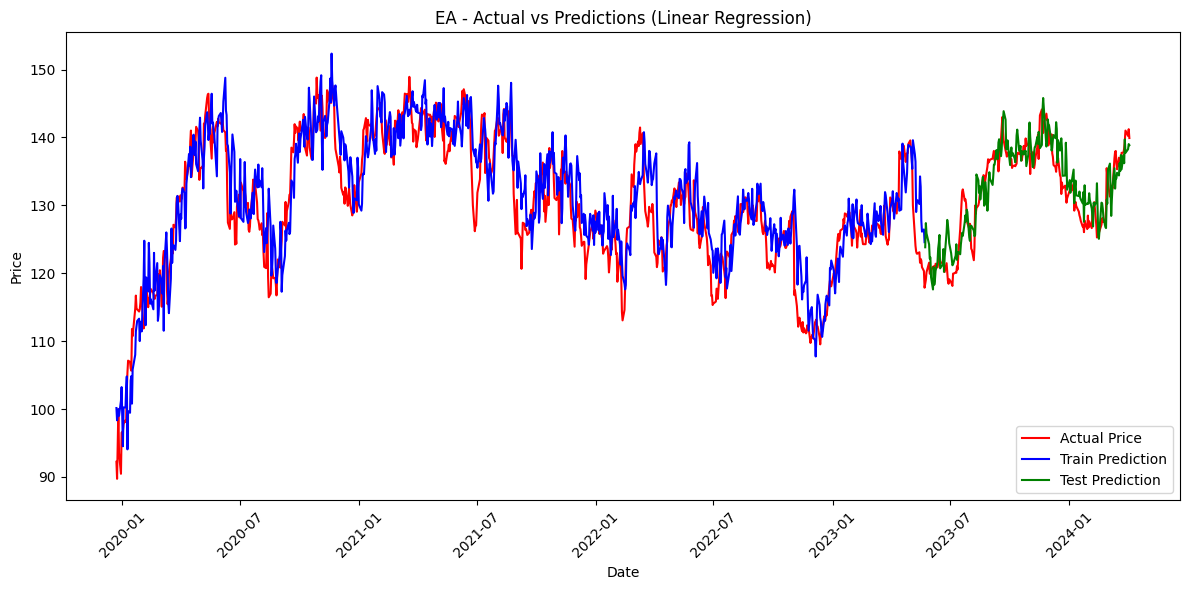

EA - Train MSE: 21.29603307120771, Train R²: 0.7844932781696107
EA - Test MSE: 10.157411233155235, Test R²: 0.7756532372737107


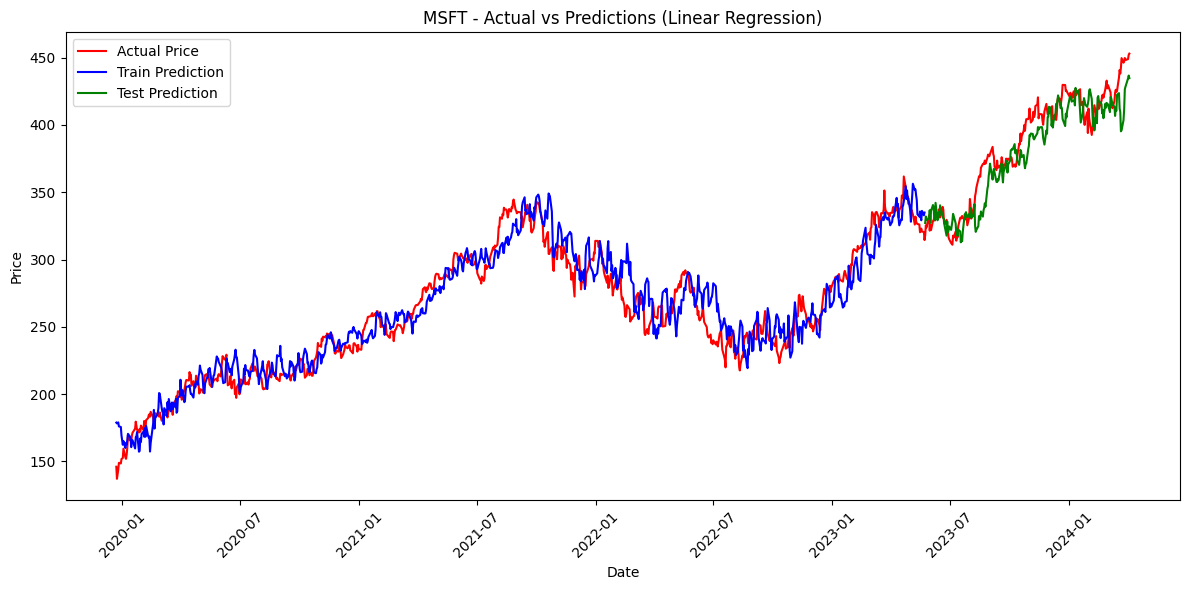

MSFT - Train MSE: 199.50879671501463, Train R²: 0.9045785448231473
MSFT - Test MSE: 249.98733146362363, Test R²: 0.8334419304634294


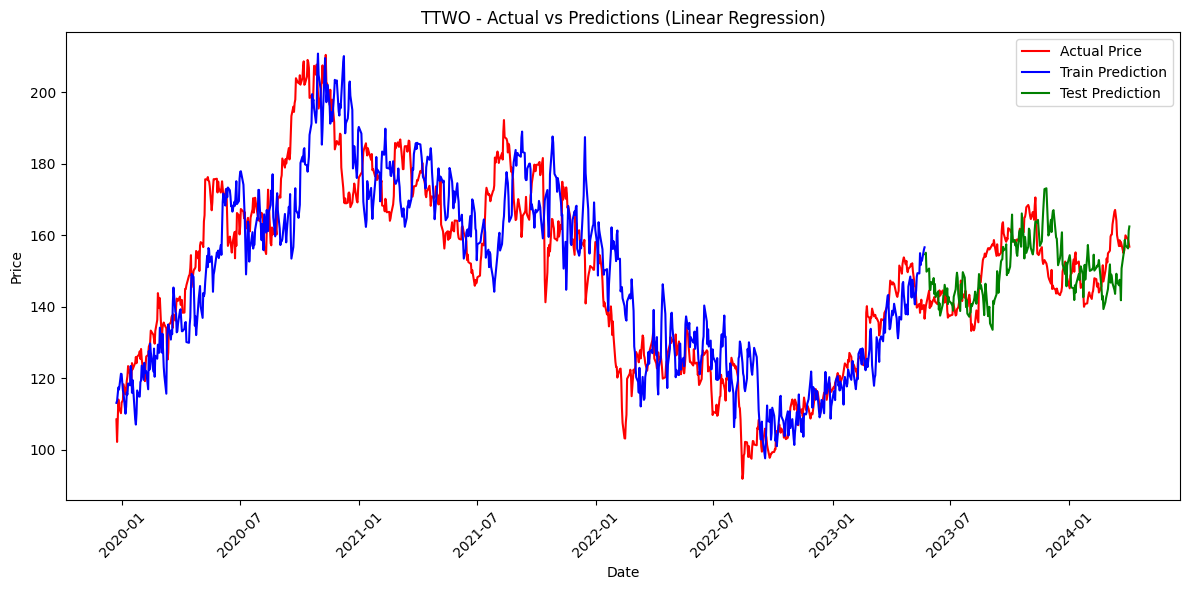

TTWO - Train MSE: 185.1457977883613, Train R²: 0.7580591175883659
TTWO - Test MSE: 88.82434217200326, Test R²: -0.14436899536854852


In [29]:
# Vẽ biểu đồ kết quả
for ticker, result in results_lr.items():
    plt.figure(figsize=(12, 6))

    # Vẽ đồ thị actual price (màu đỏ)
    plt.plot(result['dates'], result['actual'], color='red', label='Actual Price')

    # Vẽ đồ thị train và test predictions (màu xanh dương cho train, xanh lá cho test)
    plt.plot(result['dates'][:len(result['actual']) - len(test_predictions_lr)], result['predicted'][:len(result['actual']) - len(test_predictions_lr)], color='blue', label='Train Prediction')
    plt.plot(result['dates'][len(result['actual']) - len(test_predictions_lr):], result['predicted'][len(result['actual']) - len(test_predictions_lr):], color='green', label='Test Prediction')

    plt.title(f'{ticker} - Actual vs Predictions (Linear Regression)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # In ra MSE và R²
    print(f'{ticker} - Train MSE: {result["train_mse_lr"]}, Train R²: {result["train_r2_lr"]}')
    print(f'{ticker} - Test MSE: {result["test_mse_lr"]}, Test R²: {result["test_r2_lr"]}')

Cây quyết định (Decision Tree)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Lưu kết quả cho từng mã cổ phiếu
results_dt = {}

# Hàm xây dựng mô hình Decision Tree
def build_decision_tree_model():
    model_dt = DecisionTreeRegressor(random_state=42)
    return model_dt

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_dt = data[data['Ticker'] == ticker].sort_values('Date')
    X_dt, y_dt, scaler_dt, X_train_dt, X_eval_dt, y_train_dt, y_eval_dt = prepare_data(ticker_data_dt)

    # Xây dựng mô hình Decision Tree và huấn luyện
    model_dt = build_decision_tree_model()
    model_dt.fit(X_train_dt, y_train_dt)

    # Dự đoán trên dữ liệu huấn luyện
    train_predictions_dt = model_dt.predict(X_train_dt)
    train_predictions_dt = scaler_dt.inverse_transform(train_predictions_dt.reshape(-1, 1))
    y_train_actual = scaler_dt.inverse_transform(y_train_dt.reshape(-1, 1))

    # Dự đoán trên dữ liệu kiểm tra
    test_predictions_dt = model_dt.predict(X_eval_dt)
    test_predictions_dt = scaler_dt.inverse_transform(test_predictions_dt.reshape(-1, 1))
    y_eval_actual_dt = scaler_dt.inverse_transform(y_eval_dt.reshape(-1, 1))

    # Tính MSE và R² cho dữ liệu huấn luyện
    train_mse_dt = mean_squared_error(y_train_actual, train_predictions_dt)
    train_r2_dt = r2_score(y_train_actual, train_predictions_dt)

    # Tính MSE và R² cho dữ liệu kiểm tra
    test_mse_dt = mean_squared_error(y_eval_actual_dt, test_predictions_dt)
    test_r2_dt = r2_score(y_eval_actual_dt, test_predictions_dt)

    # Lưu kết quả và tính loss
    train_loss_dt = [train_mse_dt] * len(y_train_dt)  # Dùng MSE làm loss cho huấn luyện
    test_loss_dt = [test_mse_dt] * len(y_eval_dt)  # Dùng MSE làm loss cho kiểm tra

    results_dt[ticker] = {
        'dates': ticker_data.iloc[:len(y_train_dt) + len(y_eval_dt)]['Date'].values,
        'actual': np.concatenate([y_train_actual, y_eval_actual_dt], axis=0),
        'predicted': np.concatenate([train_predictions_dt, test_predictions_dt], axis=0),
        'train_mse_dt': train_mse_dt,
        'train_r2_dt': train_r2_dt,
        'test_mse_dt': test_mse_dt,
        'test_r2_dt': test_r2_dt,
        'train_loss_dt': train_loss_dt,
        'test_loss_dt': test_loss_dt,
    }

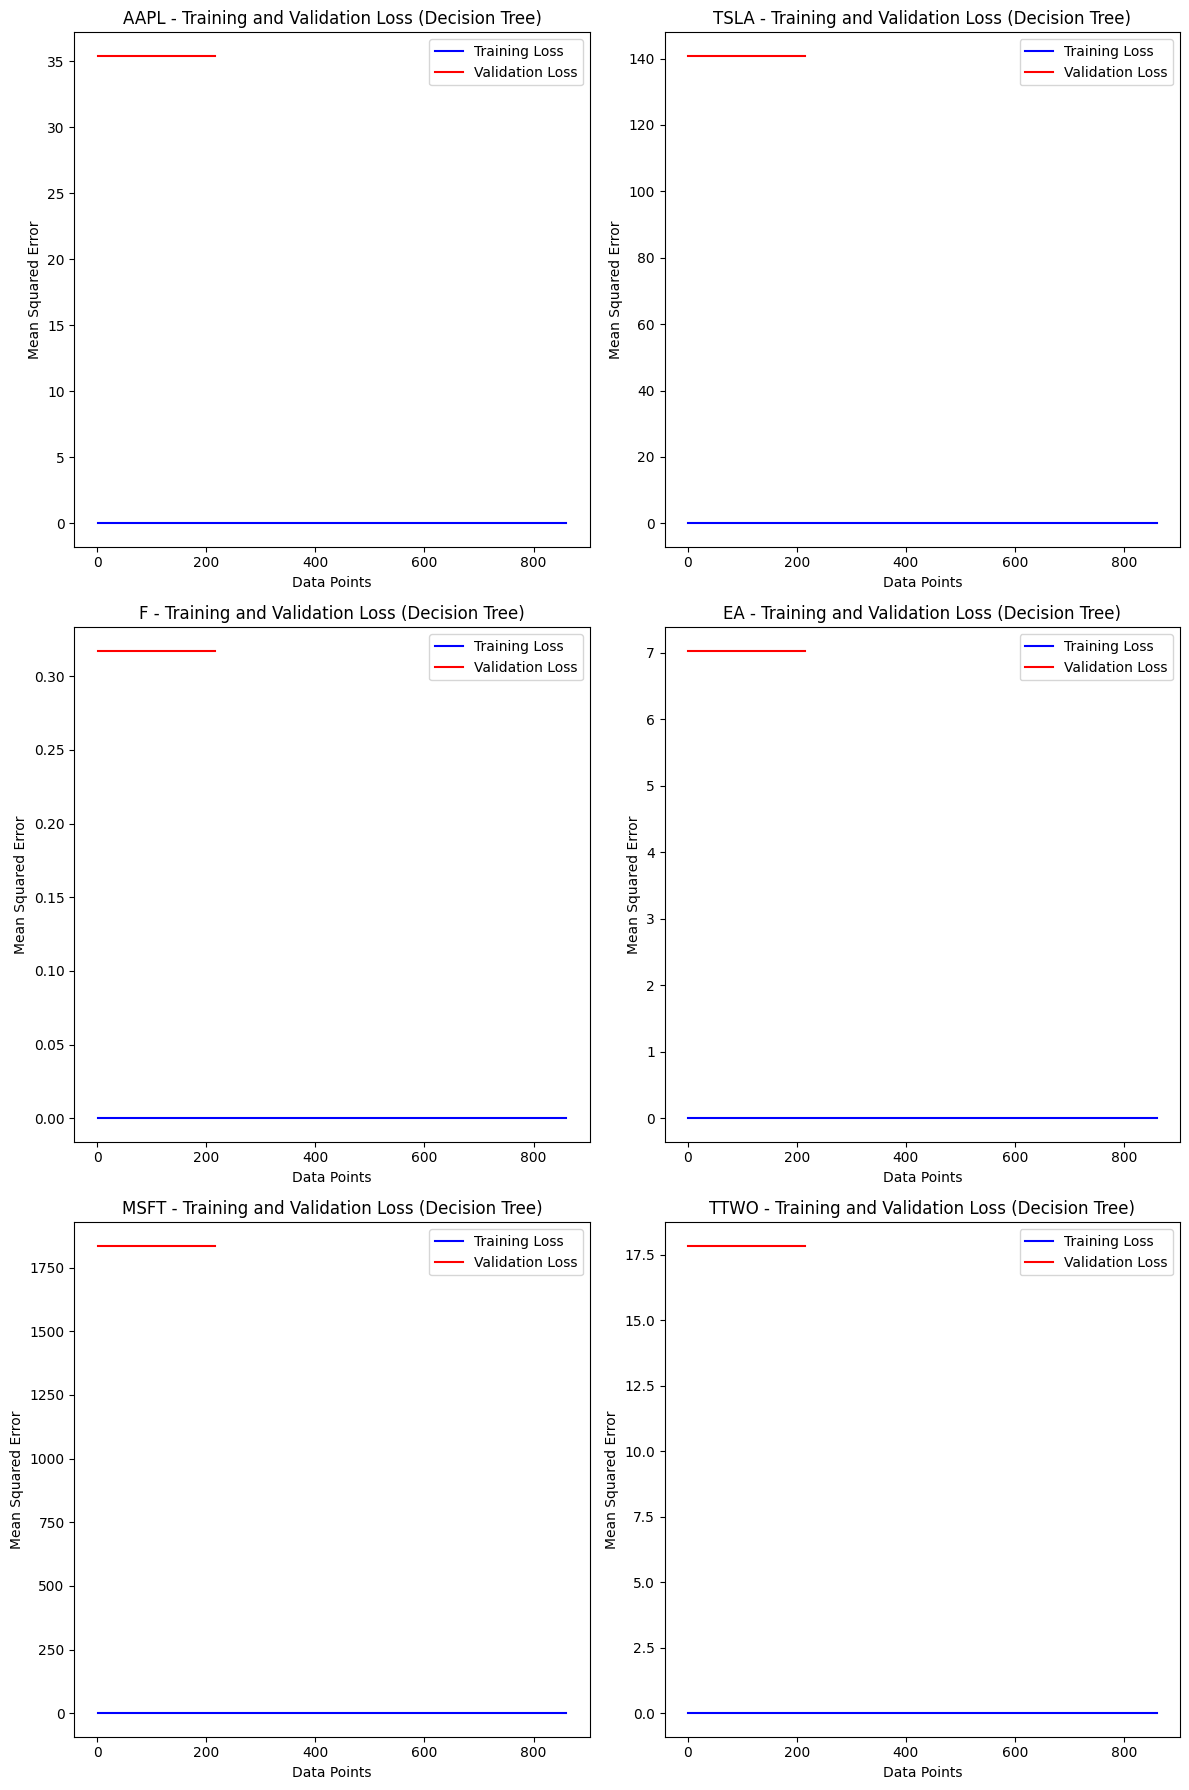

In [32]:
# Giả sử có số lượng ticker (có thể tính n từ results_dt)
n = len(results_dt)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_dt.items()):
    # Vẽ đồ thị huấn luyện và kiểm tra loss
    train_loss = result['train_loss_dt']
    test_loss = result['test_loss_dt']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
    ax.plot(range(1, len(test_loss) + 1), test_loss, label='Validation Loss', color='red')
    ax.set_xlabel('Data Points')
    ax.set_ylabel('Mean Squared Error')
    ax.set_title(f'{ticker} - Training and Validation Loss (Decision Tree)')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

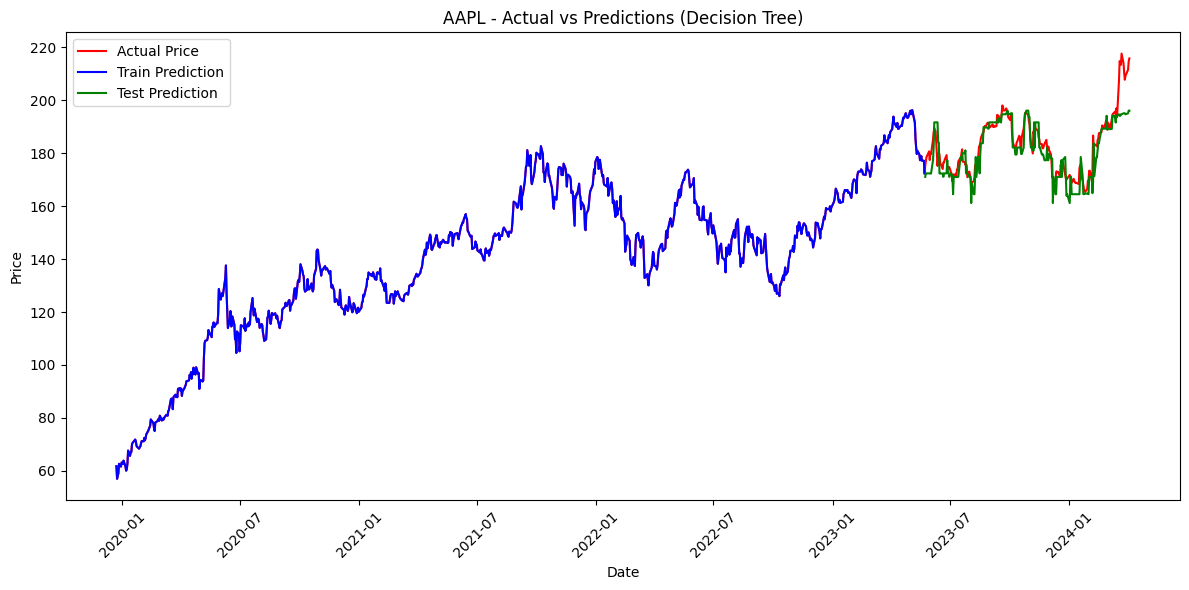

AAPL - Train MSE: 0.0, Train R²: 1.0
AAPL - Test MSE: 35.410104542354134, Test R²: 0.716350791981997


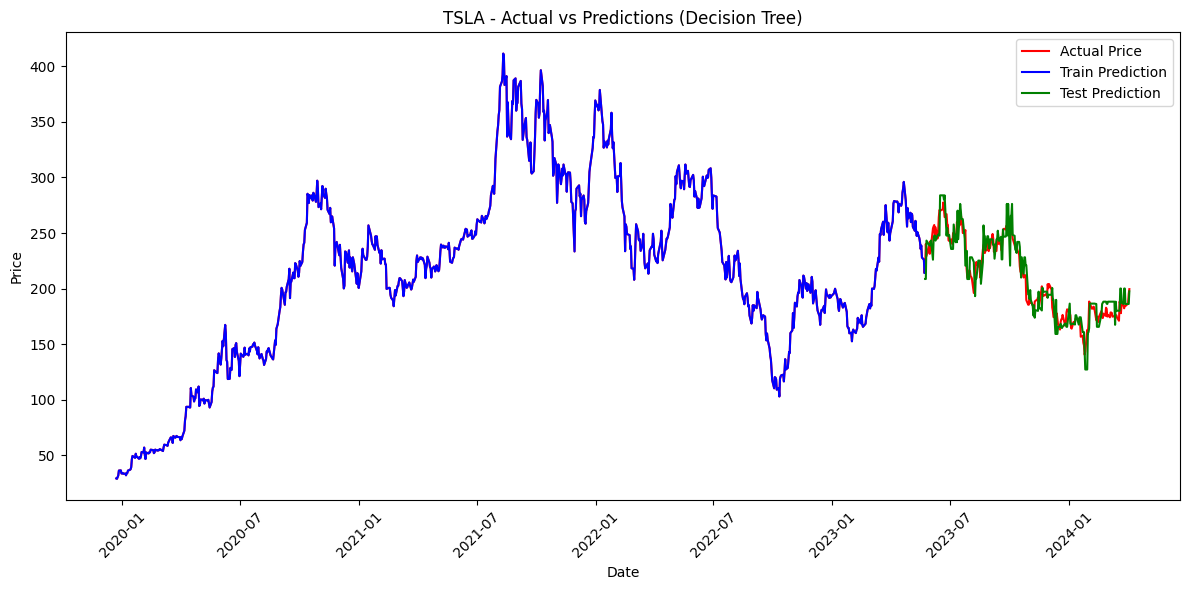

TSLA - Train MSE: 0.0, Train R²: 1.0
TSLA - Test MSE: 140.84226123136366, Test R²: 0.878098690995665


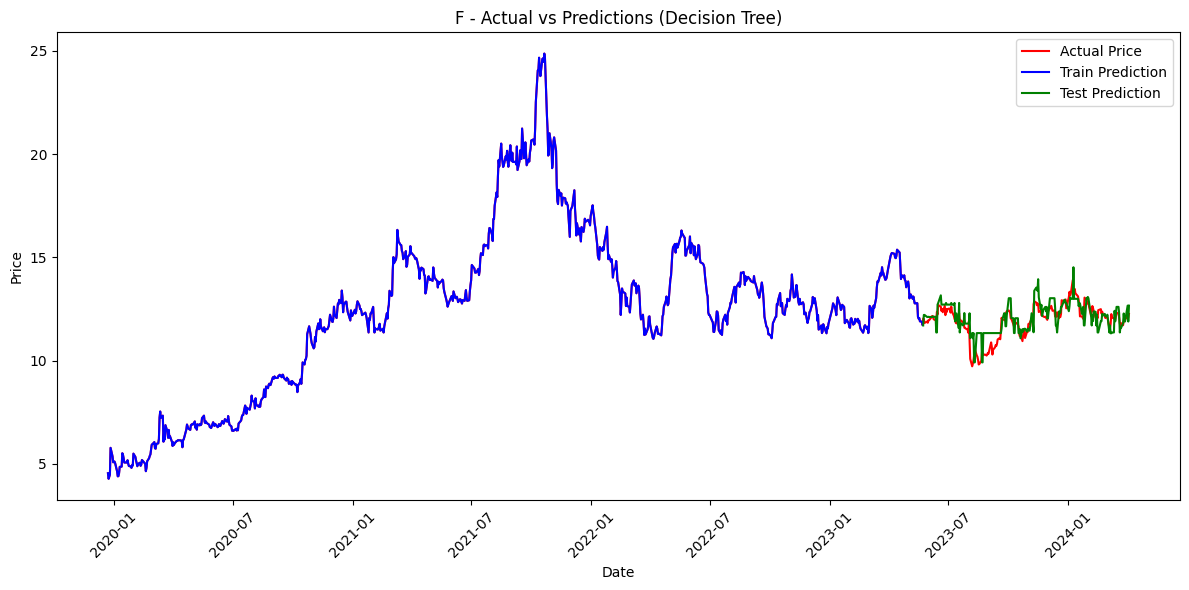

F - Train MSE: 0.0, Train R²: 1.0
F - Test MSE: 0.3172347370113709, Test R²: 0.5025460969794595


EA - Train MSE: 0.0, Train R²: 1.0
EA - Test MSE: 7.027809157394115, Test R²: 0.8447767647357747


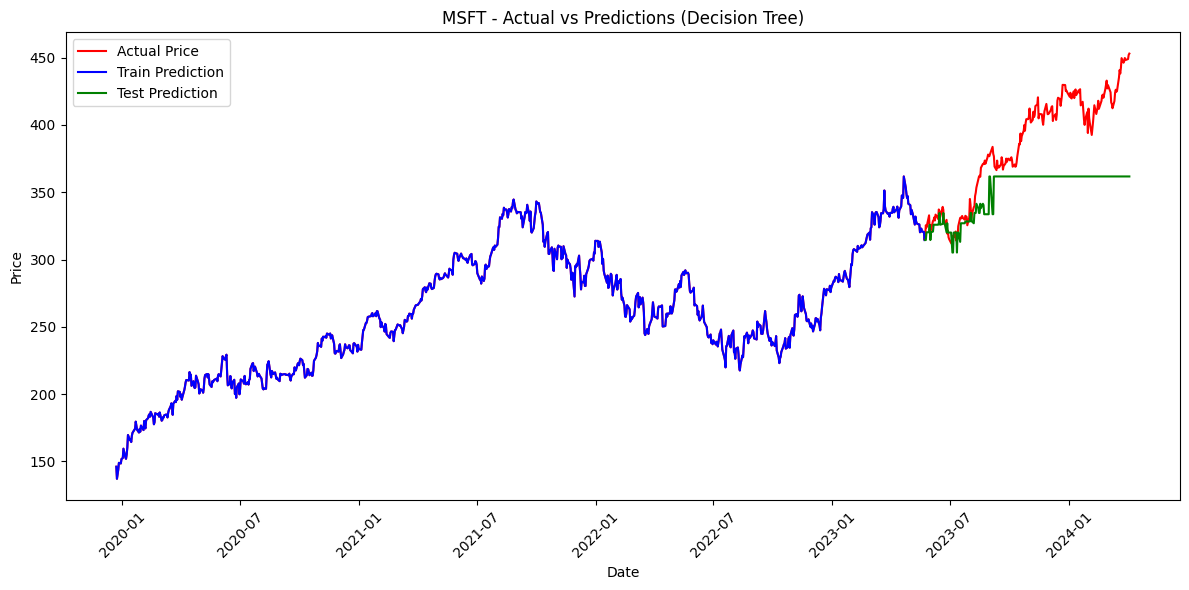

MSFT - Train MSE: 0.0, Train R²: 1.0
MSFT - Test MSE: 1835.6085659554842, Test R²: -0.22300365134633493


TTWO - Train MSE: 0.0, Train R²: 1.0
TTWO - Test MSE: 17.84552003074916, Test R²: 0.7700871255553803


In [33]:
# Vẽ biểu đồ kết quả
for ticker, result in results_dt.items():
    plt.figure(figsize=(12, 6))

    # Vẽ đồ thị actual price (màu đỏ)
    plt.plot(result['dates'], result['actual'], color='red', label='Actual Price')

    # Vẽ đồ thị train và test predictions (màu xanh dương cho train, xanh lá cho test)
    plt.plot(result['dates'][:len(result['actual']) - len(test_predictions_dt)], result['predicted'][:len(result['actual']) - len(test_predictions_dt)], color='blue', label='Train Prediction')
    plt.plot(result['dates'][len(result['actual']) - len(test_predictions_dt):], result['predicted'][len(result['actual']) - len(test_predictions_dt):], color='green', label='Test Prediction')

    plt.title(f'{ticker} - Actual vs Predictions (Decision Tree)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # In ra MSE và R²
    print(f'{ticker} - Train MSE: {result["train_mse_dt"]}, Train R²: {result["train_r2_dt"]}')
    print(f'{ticker} - Test MSE: {result["test_mse_dt"]}, Test R²: {result["test_r2_dt"]}')

ÁP DỤNG CÁC KỸ THUẬT NGĂN CHẶN OVERFITTING VÀ VẼ ĐỒ THỊ HUẤN LUYỆN.

Mạng Neural Feedforward.

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Lưu kết quả cho từng mã cổ phiếu
results_fnno = {}

# Hàm xây dựng mô hình Feedforward Neural Network (FNN) với các kỹ thuật ngăn chặn overfitting
def build_fnn_model(input_shape):
    model_fnno = Sequential()
    # Sử dụng Input layer thay vì input_dim
    model_fnno.add(Input(shape=(input_shape,)))  # Lớp Input
    model_fnno.add(Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))  # L2 Regularization
    model_fnno.add(Dropout(0.2))  # Dropout layer
    model_fnno.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))  # L2 Regularization
    model_fnno.add(Dropout(0.2))  # Dropout layer
    model_fnno.add(Dense(1))  # Output layer
    model_fnno.compile(optimizer='adam', loss='mean_squared_error')
    return model_fnno

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_fnno = data[data['Ticker'] == ticker].sort_values('Date')
    X_fnno, y_fnno, scaler_fnno, X_train_fnno, X_eval_fnno, y_train_fnno, y_eval_fnno = prepare_data(ticker_data_fnno)

    # Xây dựng mô hình FNN và huấn luyện
    model_fnno = build_fnn_model(X_train_fnno.shape[1])

    # Huấn luyện mô hình với Early Stopping
    history_fnno = model_fnno.fit(X_train_fnno, y_train_fnno, epochs=100, batch_size=32,
                        validation_data=(X_eval_fnno, y_eval_fnno),
                        verbose=0,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # Dự đoán trên tập train và test
    y_train_pred_fnno = model_fnno.predict(X_train_fnno)
    y_eval_pred_fnno = model_fnno.predict(X_eval_fnno)

    # Tính MSE và R² cho train và test
    mse_train_fnno = mean_squared_error(y_train_fnno, y_train_pred_fnno)
    mse_test_fnno = mean_squared_error(y_eval_fnno, y_eval_pred_fnno)
    r2_train_fnno = r2_score(y_train_fnno, y_train_pred_fnno)
    r2_test_fnno = r2_score(y_eval_fnno, y_eval_pred_fnno)

    # Lưu kết quả
    results_fnno[ticker] = {
        'history': history_fnno,
        'scaler': scaler_fnno,
        'model': model_fnno,
        'mse_train_fnno': mse_train_fnno,
        'mse_test_fnno': mse_test_fnno,
        'r2_train_fnno': r2_train_fnno,
        'r2_test_fnno': r2_test_fnno        
    }

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


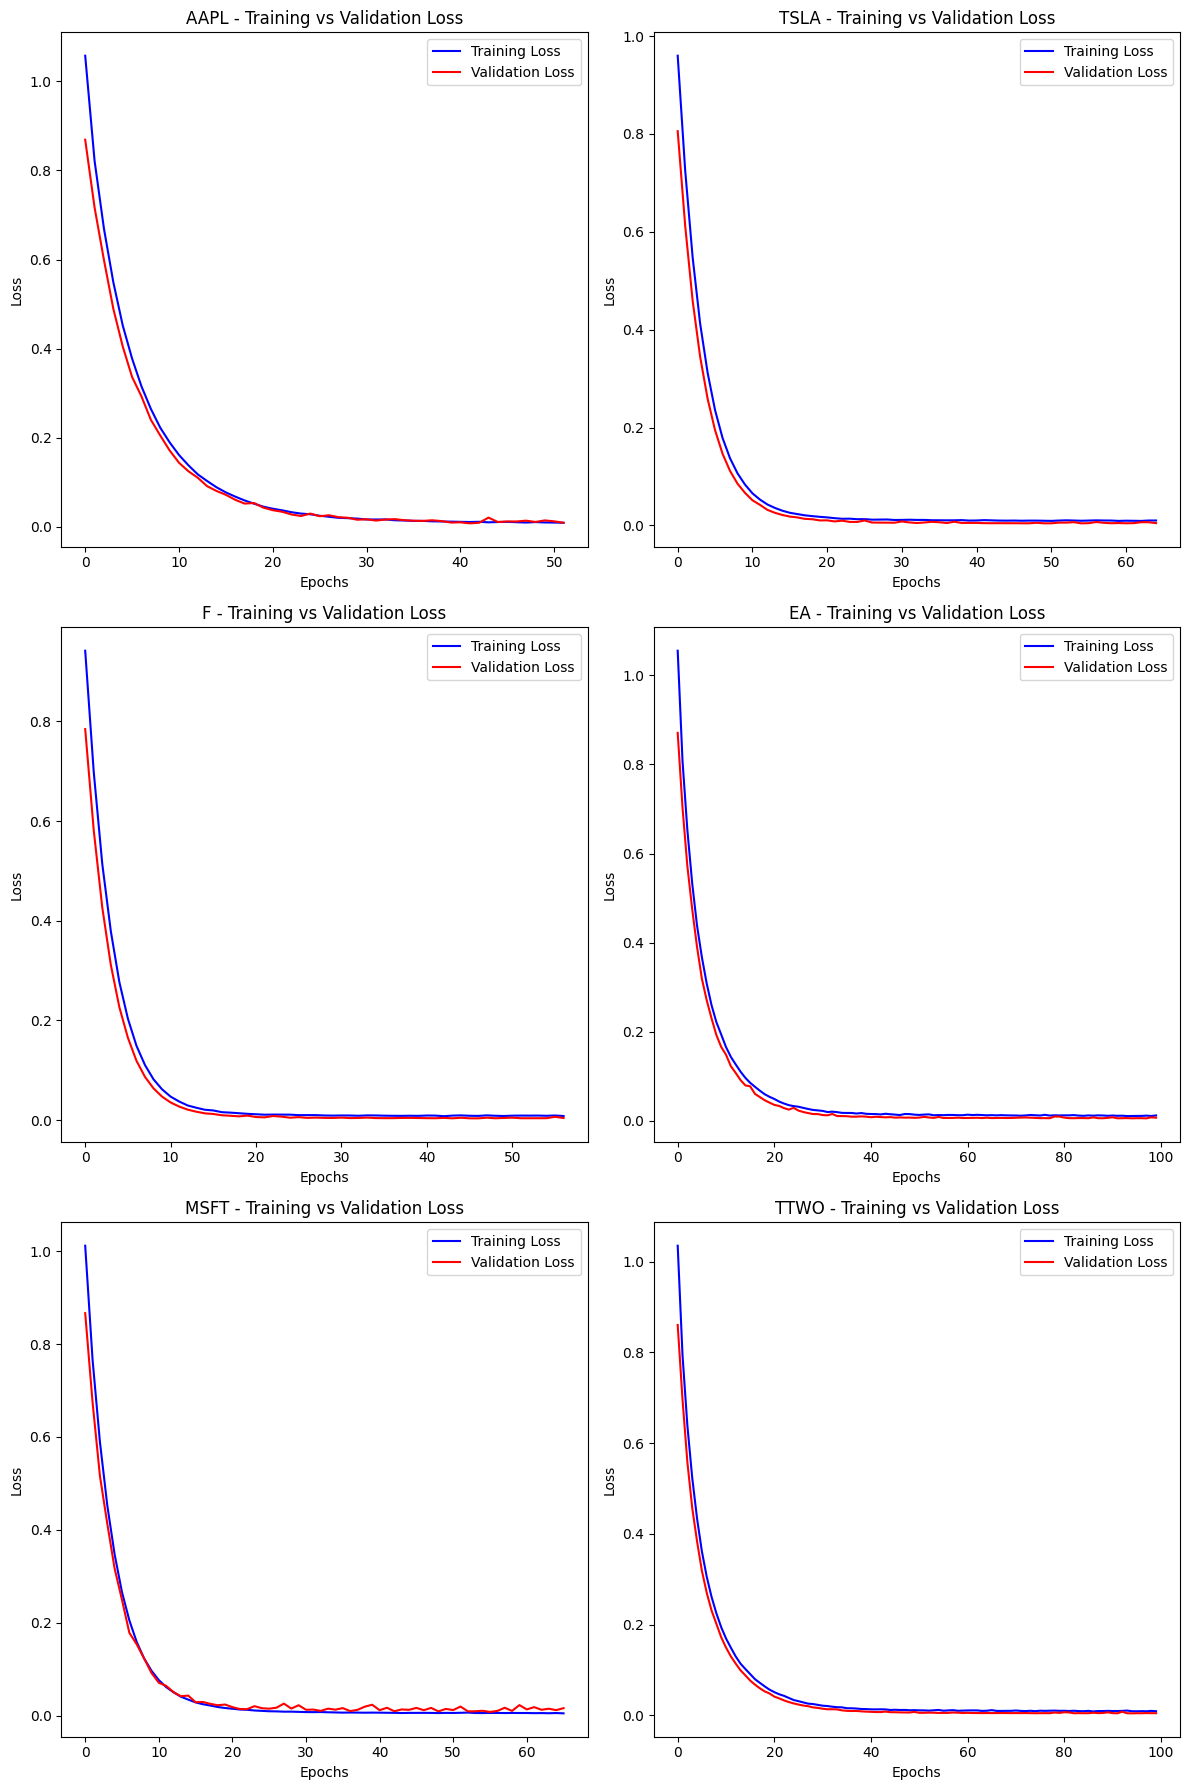

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử có số lượng ticker (có thể tính n từ results_fnno)
n = len(results_fnno)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_fnno.items()):
    history = result['history']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(history.history['loss'], color='blue', label='Training Loss')
    ax.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax.set_title(f'{ticker} - Training vs Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


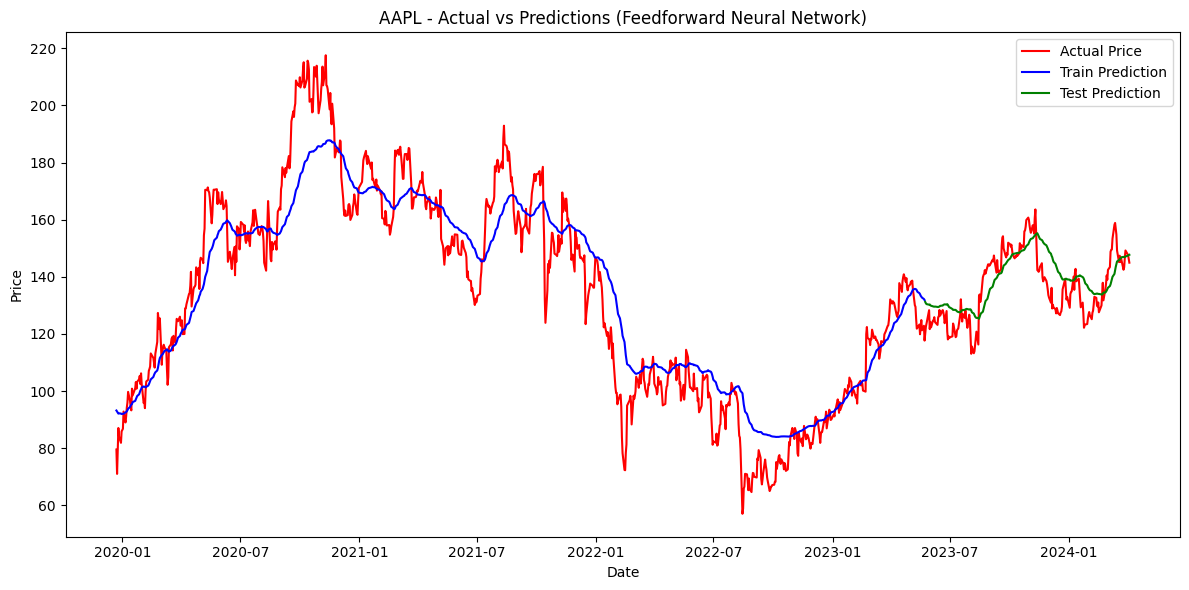

AAPL - MSE Train: 0.00270225897548796, MSE Test: 0.006154029398789244
AAPL - R² Train: 0.9160323347159005, R² Test: -0.2709917320545081
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


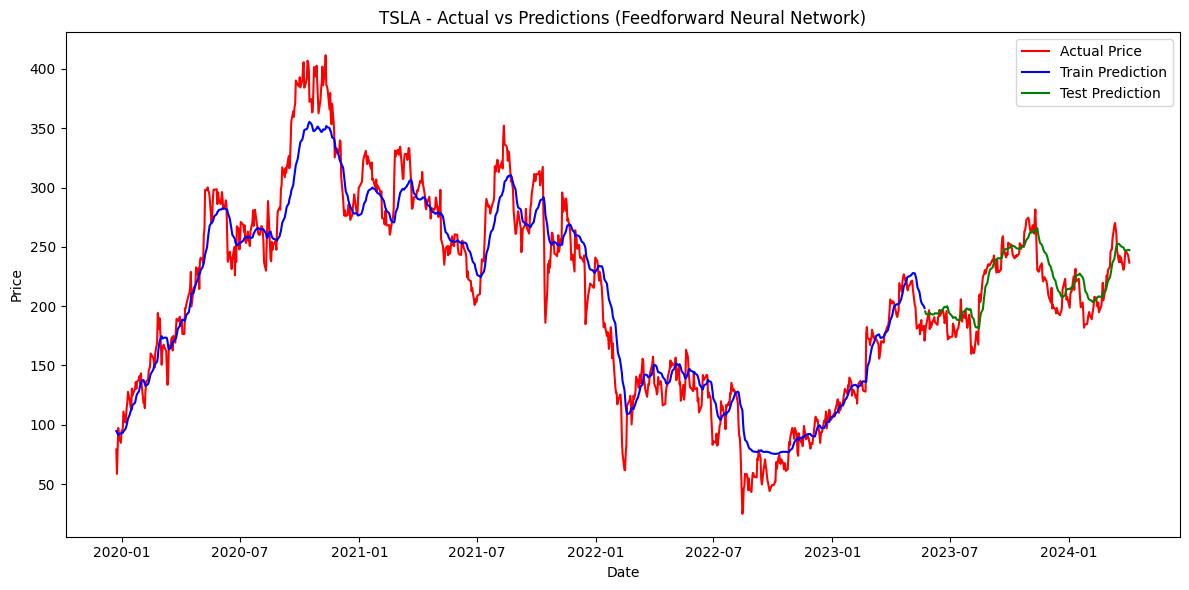

TSLA - MSE Train: 0.002954175171052913, MSE Test: 0.0014706969939118713
TSLA - R² Train: 0.9340999583365939, R² Test: 0.8098592898353192
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


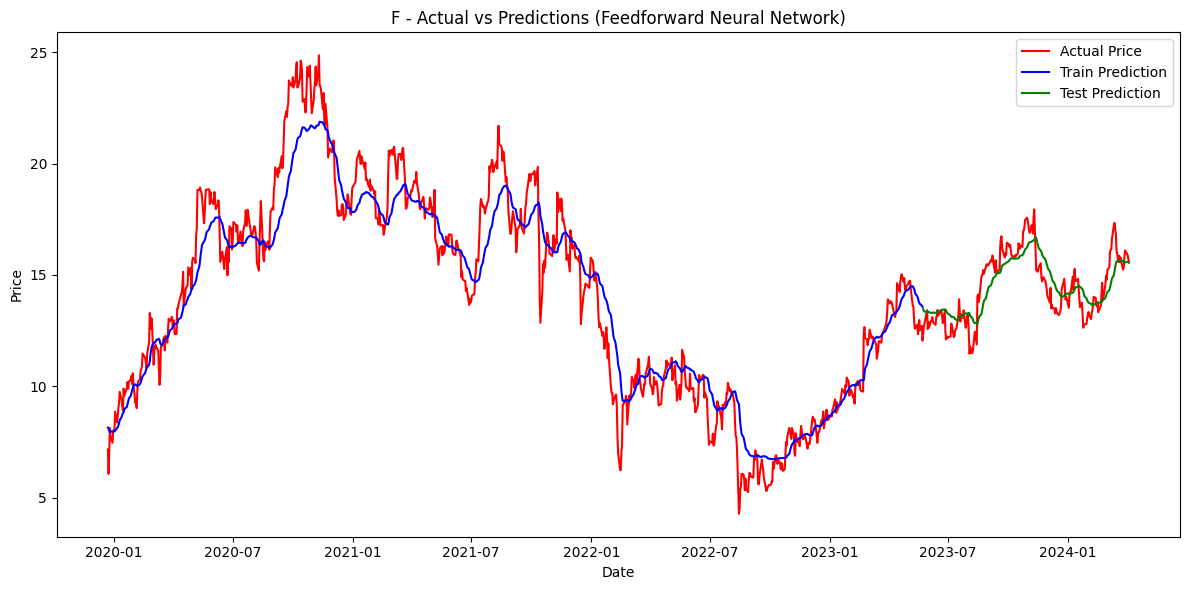

F - MSE Train: 0.0025646965703091523, MSE Test: 0.0011780265421701245
F - R² Train: 0.9315372185404249, R² Test: 0.21609820473607222
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


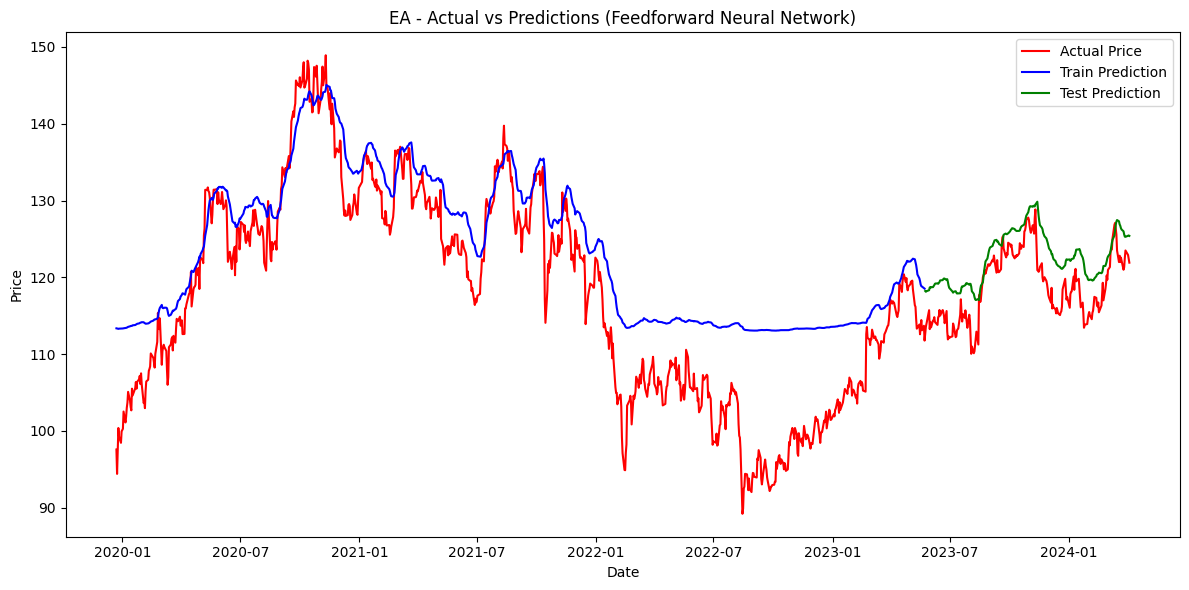

EA - MSE Train: 0.0065388976251560494, MSE Test: 0.00347350149490434
EA - R² Train: 0.7639241220405157, R² Test: 0.7262909048313934
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


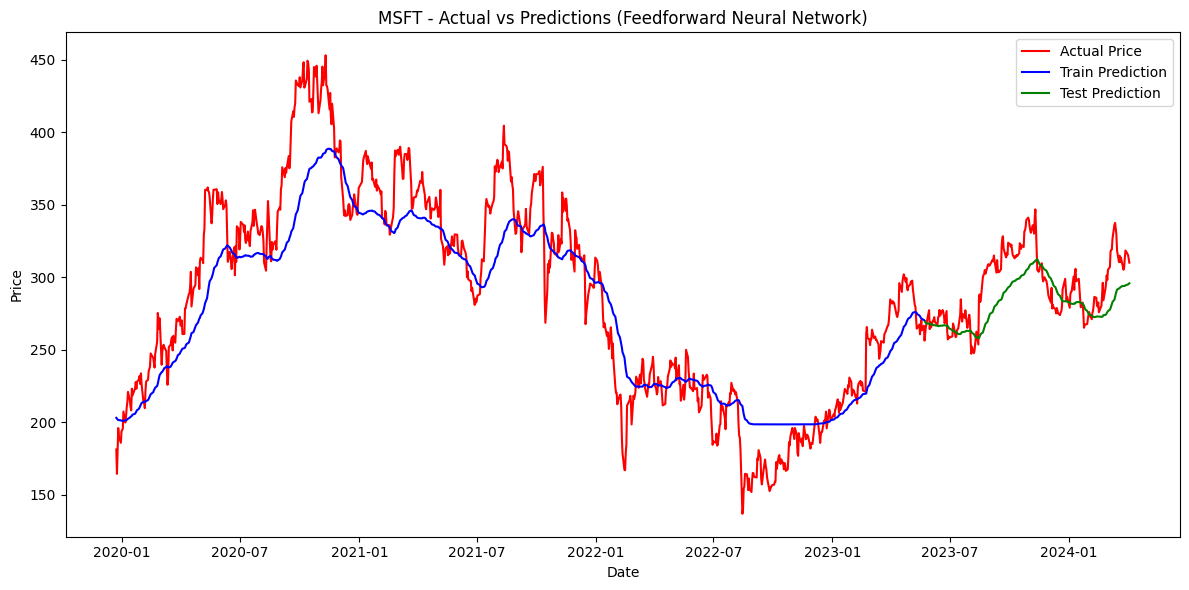

MSFT - MSE Train: 0.0027346729936927965, MSE Test: 0.014644768639255441
MSFT - R² Train: 0.8693442598536767, R² Test: 0.02530373978694911
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


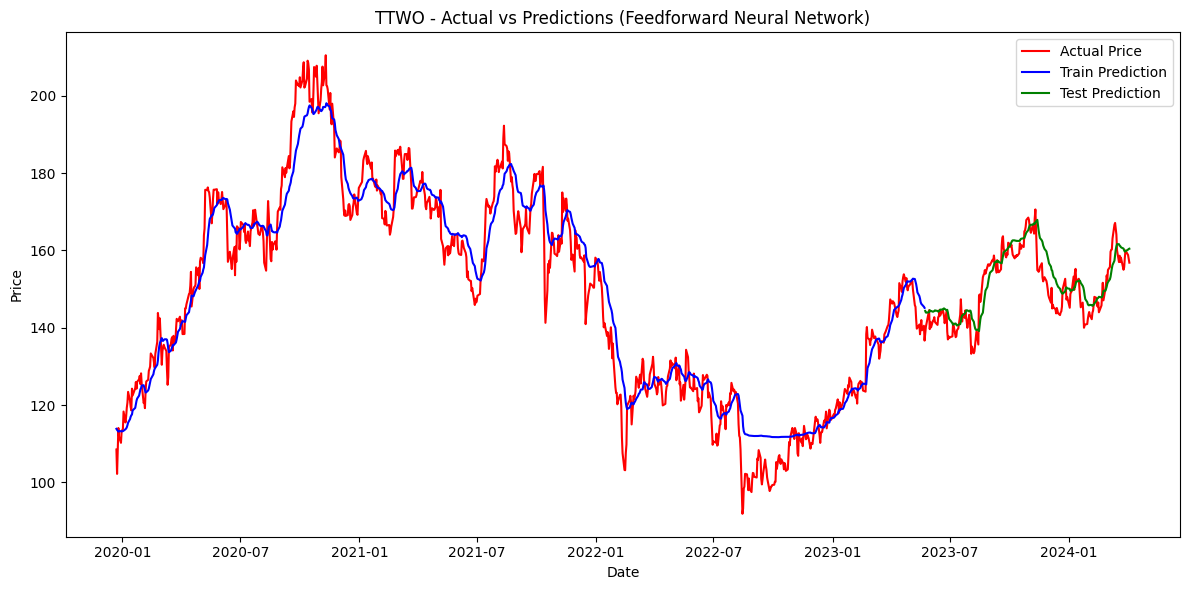

TTWO - MSE Train: 0.0030809000572756956, MSE Test: 0.001507453532244042
TTWO - R² Train: 0.9433896473000992, R² Test: 0.7269131007291793


In [37]:
for ticker, result in results_fnno.items():
    # Lấy giá trị thực và giá trị dự đoán
    y_train_actual_fnno = result['scaler'].inverse_transform(y_train_fnno.reshape(-1, 1)).flatten()
    y_train_pred_fnno = result['scaler'].inverse_transform(result['model'].predict(X_train_fnno).flatten().reshape(-1, 1)).flatten()

    y_eval_actual_fnno = result['scaler'].inverse_transform(y_eval_fnno.reshape(-1, 1)).flatten()
    y_eval_pred_fnno = result['scaler'].inverse_transform(result['model'].predict(X_eval_fnno).flatten().reshape(-1, 1)).flatten()

    # Chia dữ liệu ngày tháng cho tập huấn luyện và kiểm tra
    train_dates_fnno = ticker_data_fnno['Date'].iloc[:len(y_train_actual_fnno)].values
    test_dates_fnno = ticker_data_fnno['Date'].iloc[len(y_train_actual_fnno):len(y_train_actual_fnno) + len(y_eval_actual_fnno)].values

    # Kết hợp dữ liệu thực tế
    actual_dates_fnno = np.concatenate([train_dates_fnno, test_dates_fnno])
    actual_prices_fnno = np.concatenate([y_train_actual_fnno, y_eval_actual_fnno])

    # Vẽ đồ thị giá trị thực tế và dự đoán
    plt.figure(figsize=(12, 6))
    plt.plot(actual_dates_fnno, actual_prices_fnno, color='red', label='Actual Price')
    plt.plot(train_dates_fnno, y_train_pred_fnno, color='blue', label='Train Prediction')
    plt.plot(test_dates_fnno, y_eval_pred_fnno, color='green', label='Test Prediction')
    plt.title(f'{ticker} - Actual vs Predictions (Feedforward Neural Network)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # In thông tin MSE và R²
    print(f"{ticker} - MSE Train: {result['mse_train_fnno']}, MSE Test: {result['mse_test_fnno']}")
    print(f"{ticker} - R² Train: {result['r2_train_fnno']}, R² Test: {result['r2_test_fnno']}")

Mạng Neural Recurrent (RNN)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Lưu kết quả cho từng mã cổ phiếu
results_rnno = {}

# Hàm xây dựng mô hình RNN với các kỹ thuật ngăn chặn overfitting
def build_rnn_model(input_shape):
    model_rnno = Sequential()
    # Sử dụng Input layer cho dữ liệu chuỗi (time-series)
    model_rnno.add(Input(shape=(input_shape, 1)))  # Lớp Input
    model_rnno.add(LSTM(50, return_sequences=True,
                        kernel_regularizer=regularizers.l2(0.01)))  # LSTM với L2 Regularization
    model_rnno.add(Dropout(0.2))  # Dropout layer
    model_rnno.add(LSTM(50, kernel_regularizer=regularizers.l2(0.01)))  # LSTM với L2 Regularization
    model_rnno.add(Dropout(0.2))  # Dropout layer
    model_rnno.add(Dense(1))  # Output layer
    model_rnno.compile(optimizer='adam', loss='mean_squared_error')
    return model_rnno

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_rnno = data[data['Ticker'] == ticker].sort_values('Date')
    X_rnno, y_rnno, scaler_rnno, X_train_rnno, X_eval_rnno, y_train_rnno, y_eval_rnno = prepare_data(ticker_data_rnno)

    # Xây dựng mô hình RNN và huấn luyện
    model_rnno = build_rnn_model(X_train_rnno.shape[1])

    # Huấn luyện mô hình với Early Stopping
    history_rnno = model_rnno.fit(X_train_rnno, y_train_rnno, epochs=100, batch_size=32,
                                  validation_data=(X_eval_rnno, y_eval_rnno),
                                  verbose=0,
                                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # Dự đoán trên tập train và test
    y_train_pred_rnno = model_rnno.predict(X_train_rnno)
    y_eval_pred_rnno = model_rnno.predict(X_eval_rnno)

    # Tính MSE và R² cho train và test
    mse_train_rnno = mean_squared_error(y_train_rnno, y_train_pred_rnno)
    mse_test_rnno = mean_squared_error(y_eval_rnno, y_eval_pred_rnno)
    r2_train_rnno = r2_score(y_train_rnno, y_train_pred_rnno)
    r2_test_rnno = r2_score(y_eval_rnno, y_eval_pred_rnno)

    # Lưu kết quả
    results_rnno[ticker] = {
        'history': history_rnno,
        'scaler': scaler_rnno,
        'model': model_rnno,
        'mse_train_rnno': mse_train_rnno,
        'mse_test_rnno': mse_test_rnno,
        'r2_train_rnno': r2_train_rnno,
        'r2_test_rnno': r2_test_rnno        
    }

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


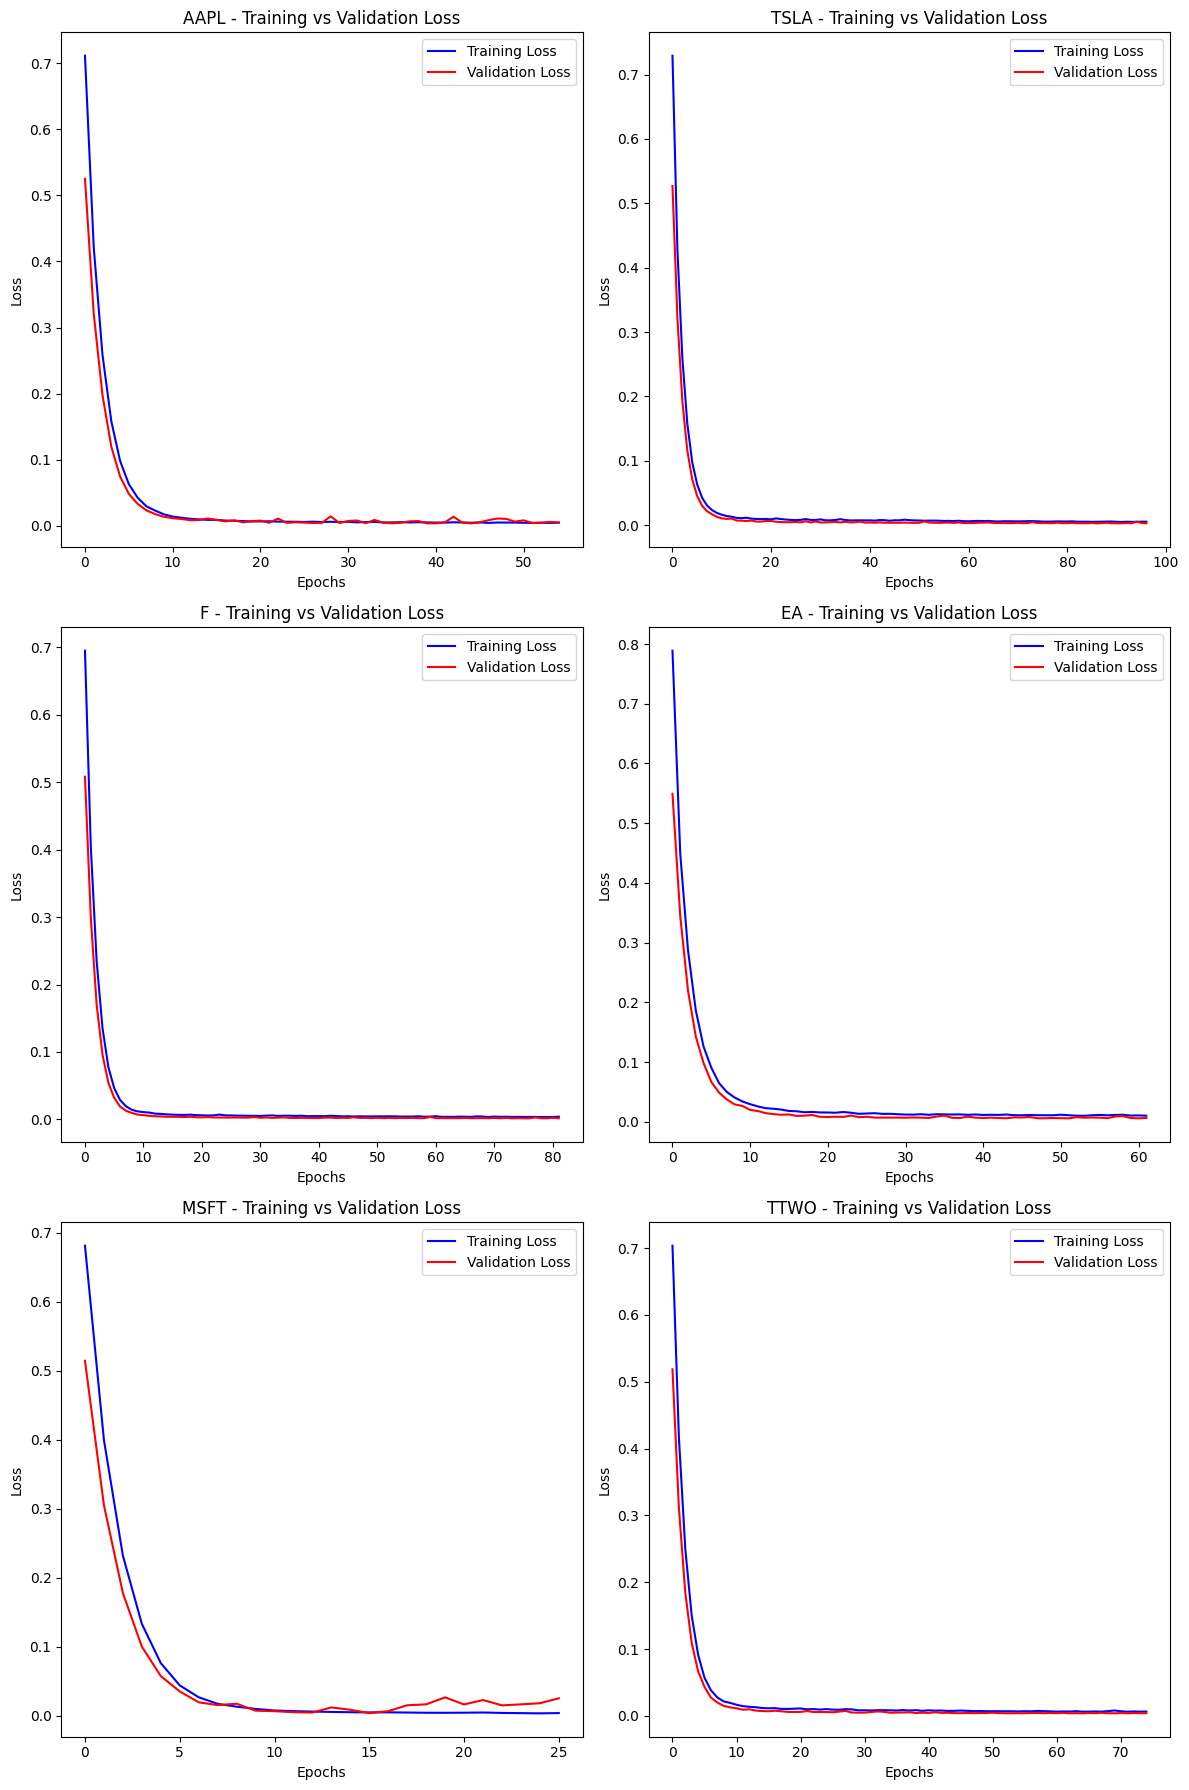

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử có số lượng ticker (có thể tính n từ results_rnno)
n = len(results_rnno)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_rnno.items()):
    history = result['history']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(history.history['loss'], color='blue', label='Training Loss')
    ax.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax.set_title(f'{ticker} - Training vs Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


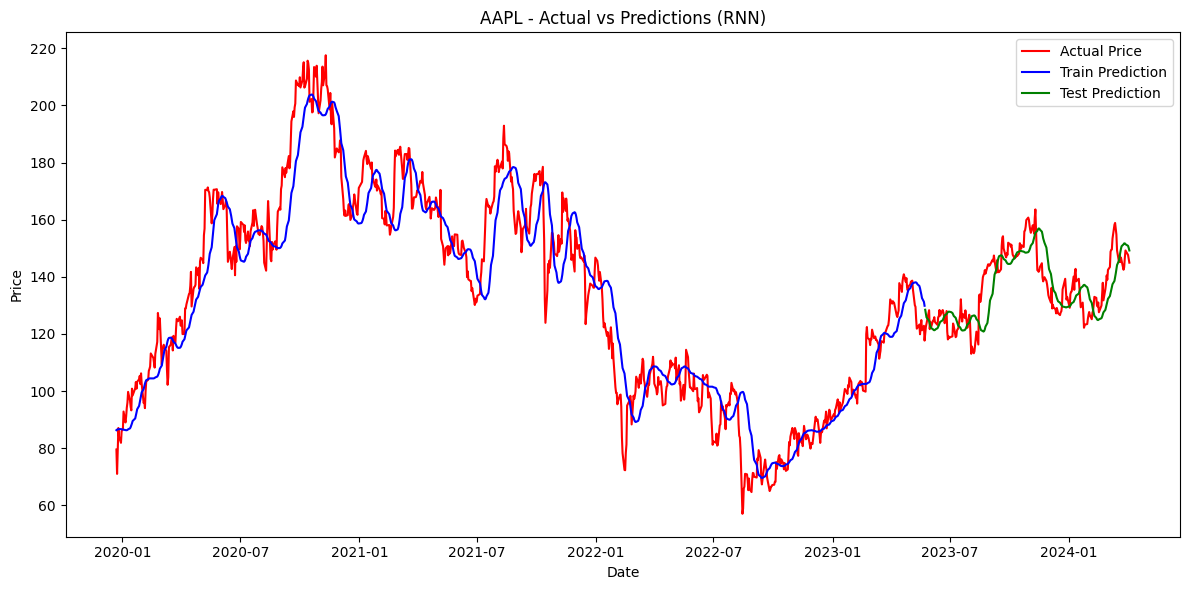

AAPL - MSE Train: 0.002029963066051191, MSE Test: 0.003893429652850747
AAPL - R² Train: 0.9369226780943556, R² Test: 0.1958899482861206
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


TSLA - MSE Train: 0.0024689897323336785, MSE Test: 0.0014454491622807833
TSLA - R² Train: 0.9449231962201753, R² Test: 0.813123484061816
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


F - MSE Train: 0.002445744504929463, MSE Test: 0.0007423305693055638
F - R² Train: 0.9347125607429035, R² Test: 0.5060261843625864
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


EA - MSE Train: 0.00613011775184366, MSE Test: 0.004310501892119561
EA - R² Train: 0.7786824304001891, R² Test: 0.6603359536924269
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


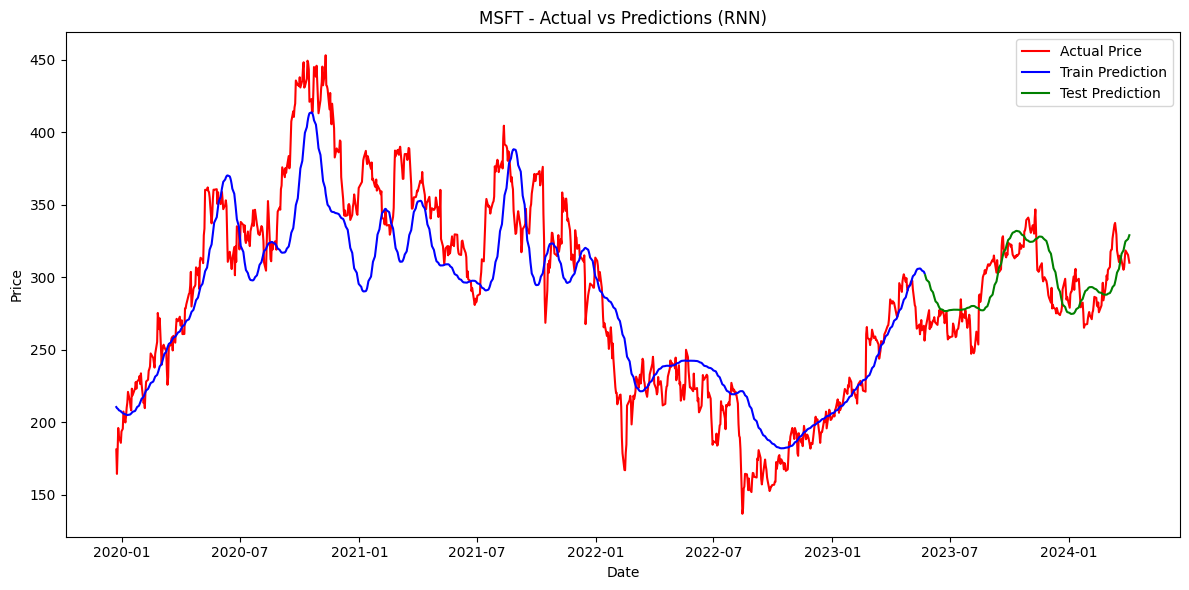

MSFT - MSE Train: 0.0020503277626079605, MSE Test: 0.024377646700304047
MSFT - R² Train: 0.902040539404913, R² Test: -0.6224770535391269
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


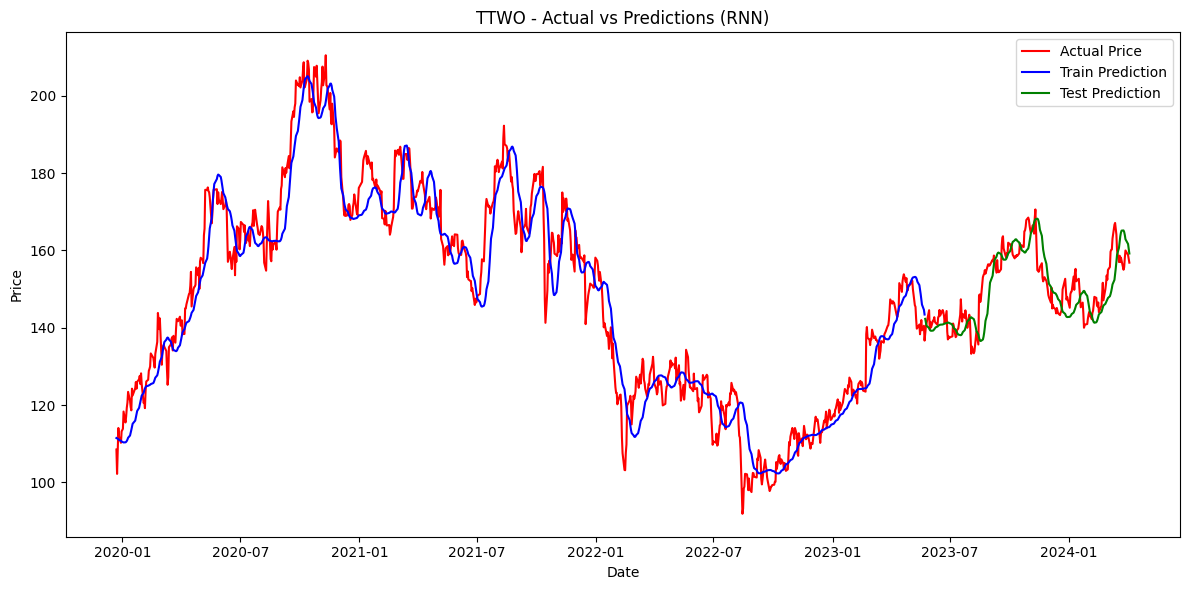

TTWO - MSE Train: 0.003699446902084566, MSE Test: 0.0025020992537099166
TTWO - R² Train: 0.9320240871082492, R² Test: 0.5467253137505947


In [41]:
for ticker, result in results_rnno.items():
    # Lấy giá trị thực và giá trị dự đoán
    y_train_actual_rnno = result['scaler'].inverse_transform(y_train_rnno.reshape(-1, 1)).flatten()
    y_train_pred_rnno = result['scaler'].inverse_transform(result['model'].predict(X_train_rnno).flatten().reshape(-1, 1)).flatten()

    y_eval_actual_rnno = result['scaler'].inverse_transform(y_eval_rnno.reshape(-1, 1)).flatten()
    y_eval_pred_rnno = result['scaler'].inverse_transform(result['model'].predict(X_eval_rnno).flatten().reshape(-1, 1)).flatten()

    # Chia dữ liệu ngày tháng cho tập huấn luyện và kiểm tra
    train_dates_rnno = ticker_data_rnno['Date'].iloc[:len(y_train_actual_rnno)].values
    test_dates_rnno = ticker_data_rnno['Date'].iloc[len(y_train_actual_rnno):len(y_train_actual_rnno) + len(y_eval_actual_rnno)].values

    # Kết hợp dữ liệu thực tế
    actual_dates_rnno = np.concatenate([train_dates_rnno, test_dates_rnno])
    actual_prices_rnno = np.concatenate([y_train_actual_rnno, y_eval_actual_rnno])

    # Vẽ đồ thị giá trị thực tế và dự đoán
    plt.figure(figsize=(12, 6))
    plt.plot(actual_dates_rnno, actual_prices_rnno, color='red', label='Actual Price')
    plt.plot(train_dates_rnno, y_train_pred_rnno, color='blue', label='Train Prediction')
    plt.plot(test_dates_rnno, y_eval_pred_rnno, color='green', label='Test Prediction')
    plt.title(f'{ticker} - Actual vs Predictions (RNN)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # In thông tin MSE và R²
    print(f"{ticker} - MSE Train: {result['mse_train_rnno']}, MSE Test: {result['mse_test_rnno']}")
    print(f"{ticker} - R² Train: {result['r2_train_rnno']}, R² Test: {result['r2_test_rnno']}")

Hồi quy tuyến tính (Linear Regression)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Lưu kết quả cho từng mã cổ phiếu
results_lro = {}

# Hàm xây dựng mô hình Hồi quy tuyến tính với L2 Regularization
def build_linear_regression_model(input_shape):
    model_lro = Sequential()
    model_lro.add(Input(shape=(input_shape,)))  # Lớp Input cho hình dạng đầu vào
    model_lro.add(Dense(1, kernel_regularizer=regularizers.l2(0.01)))  # L2 Regularization
    model_lro.compile(optimizer='adam', loss='mean_squared_error')
    return model_lro

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_lro = data[data['Ticker'] == ticker].sort_values('Date')
    X_lro, y_lro, scaler_lro, X_train_lro, X_eval_lro, y_train_lro, y_eval_lro = prepare_data(ticker_data_lro)

    # Xây dựng và huấn luyện mô hình Hồi quy tuyến tính với EarlyStopping
    model_lro = build_linear_regression_model(X_train_lro.shape[1])

    # Sử dụng EarlyStopping để dừng huấn luyện khi không có cải thiện
    early_stopping_lro = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Huấn luyện mô hình
    history_lro = model_lro.fit(X_train_lro, y_train_lro, epochs=100, batch_size=32, validation_data=(X_eval_lro, y_eval_lro),
                        verbose=0, callbacks=[early_stopping_lro])

    # Dự đoán trên dữ liệu huấn luyện
    train_predictions_lro = model_lro.predict(X_train_lro)
    train_predictions_lro = scaler_lro.inverse_transform(train_predictions_lro)
    y_train_actual_lro = scaler_lro.inverse_transform(y_train_lro.reshape(-1, 1))

    # Dự đoán trên dữ liệu kiểm tra
    test_predictions_lro = model_lro.predict(X_eval_lro)
    test_predictions_lro = scaler_lro.inverse_transform(test_predictions_lro)
    y_eval_actual_lro = scaler_lro.inverse_transform(y_eval_lro.reshape(-1, 1))

    # Tính MSE và R² cho dữ liệu huấn luyện và kiểm tra
    mse_train_lro = mean_squared_error(y_train_actual_lro, train_predictions_lro)
    mse_test_lro = mean_squared_error(y_eval_actual_lro, test_predictions_lro)
    r2_train_lro = r2_score(y_train_actual_lro, train_predictions_lro)
    r2_test_lro = r2_score(y_eval_actual_lro, test_predictions_lro)

    # Lưu kết quả
    results_lro[ticker] = {
        'history': history_lro,
        'scaler': scaler_lro,
        'model': model_dt,
        'mse_train_lro': mse_train_lro,
        'mse_test_lro': mse_test_lro,
        'r2_train_lro': r2_train_lro,
        'r2_test_lro': r2_test_lro,
        'dates': ticker_data.iloc[:len(y_train_lro) + len(y_eval_lro)]['Date'].values,
        'actual': np.concatenate([y_train_actual_lro, y_eval_actual_lro], axis=0),
        'predicted': np.concatenate([train_predictions_lro, test_predictions_lro], axis=0),
    }

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử có số lượng ticker (có thể tính n từ results_lro)
n = len(results_lro)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_lro.items()):
    history = result['history']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(history.history['loss'], color='blue', label='Training Loss')
    ax.plot(history.history['val_loss'], color='red', label='Validation Loss')
    ax.set_title(f'{ticker} - Training vs Validation Loss (Linear Regression)')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

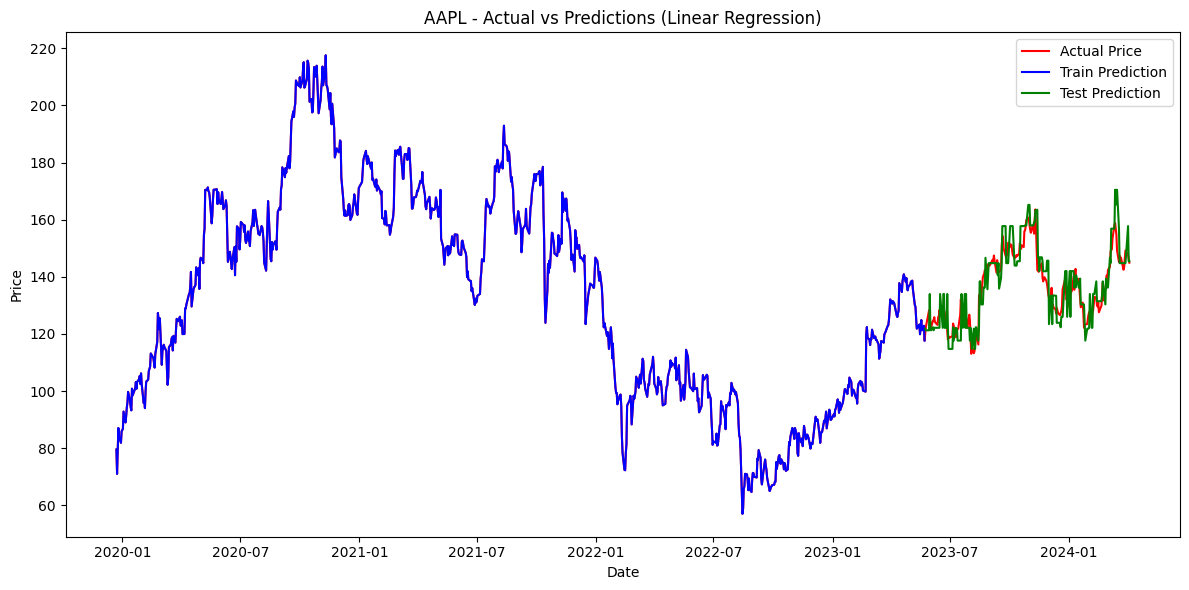

AAPL - MSE Train: 27.378104733804385, MSE Test: 31.409069087819855
AAPL - R² Train: 0.9670041213372333, R² Test: 0.7484006984309642


TSLA - MSE Train: 222.23661322806885, MSE Test: 113.05540704316913
TSLA - R² Train: 0.9668114308888275, R² Test: 0.9021486733591916


F - MSE Train: 0.48308962655231263, MSE Test: 0.1695284129286932
F - R² Train: 0.9696113236802808, R² Test: 0.734163504669309


EA - MSE Train: 9.179565341503979, MSE Test: 4.758566107409864
EA - R² Train: 0.9071067354205985, R² Test: 0.8948975406320318


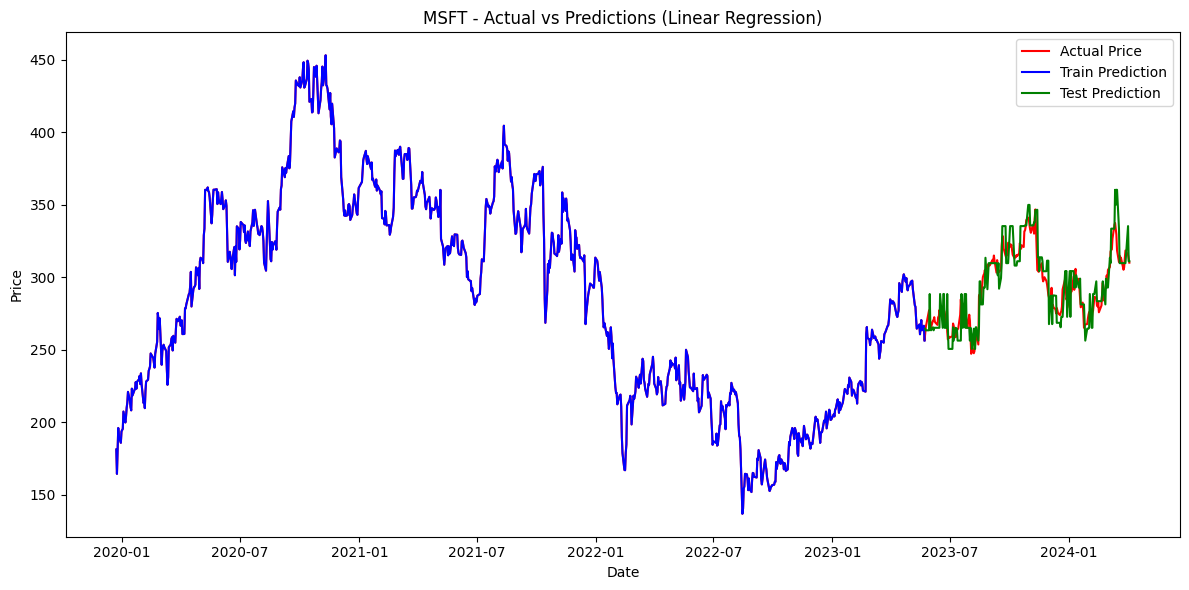

MSFT - MSE Train: 84.29473877591163, MSE Test: 133.7571246511719
MSFT - R² Train: 0.9596833484528513, R² Test: 0.9108821701554768


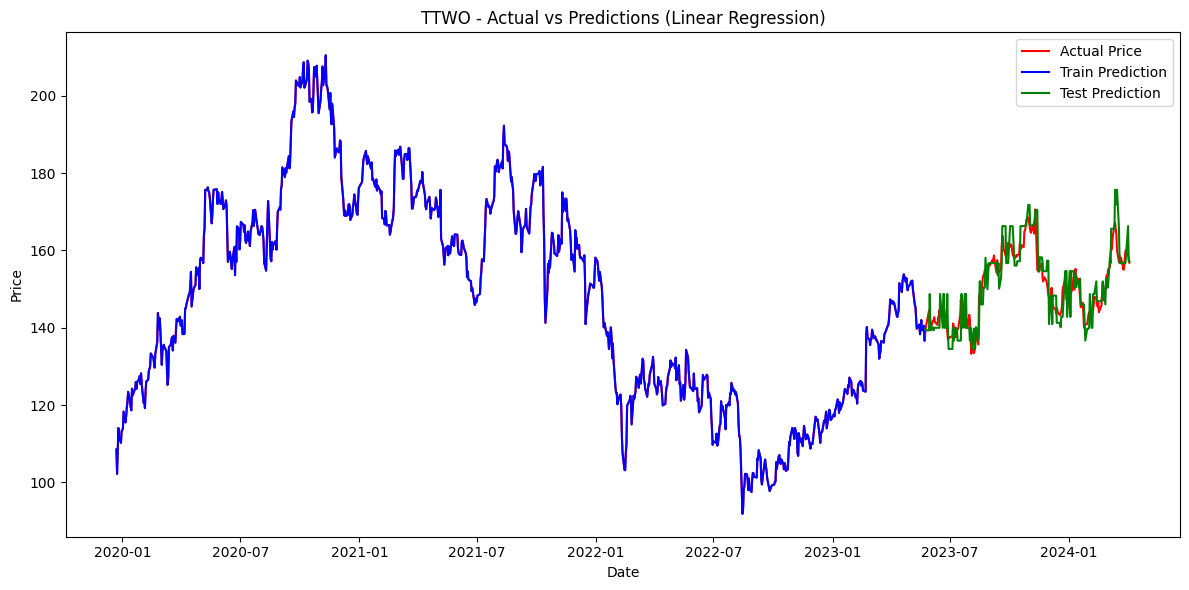

TTWO - MSE Train: 25.002045073542483, MSE Test: 13.500828525380241
TTWO - R² Train: 0.967328360030602, R² Test: 0.8260619870810355


In [45]:
for ticker, result in results_lro.items():
    # Lấy giá trị thực và giá trị dự đoán
    y_train_actual_lro = result['scaler'].inverse_transform(y_train_lro.reshape(-1, 1)).flatten()
    y_train_pred_lro = result['scaler'].inverse_transform(result['model'].predict(X_train_lro).flatten().reshape(-1, 1)).flatten()

    y_eval_actual_lro = result['scaler'].inverse_transform(y_eval_lro.reshape(-1, 1)).flatten()
    y_eval_pred_lro = result['scaler'].inverse_transform(result['model'].predict(X_eval_lro).flatten().reshape(-1, 1)).flatten()

    # Chia dữ liệu ngày tháng cho tập huấn luyện và kiểm tra
    train_dates_lro = ticker_data_lro['Date'].iloc[:len(y_train_actual_lro)].values
    test_dates_lro = ticker_data_lro['Date'].iloc[len(y_train_actual_lro):len(y_train_actual_lro) + len(y_eval_actual_lro)].values

    # Kết hợp dữ liệu thực tế
    actual_dates_lro = np.concatenate([train_dates_lro, test_dates_lro])
    actual_prices_lro = np.concatenate([y_train_actual_lro, y_eval_actual_lro])

    # Vẽ đồ thị giá trị thực tế và dự đoán
    plt.figure(figsize=(12, 6))
    plt.plot(actual_dates_lro, actual_prices_lro, color='red', label='Actual Price')
    plt.plot(train_dates_lro, y_train_pred_lro, color='blue', label='Train Prediction')
    plt.plot(test_dates_lro, y_eval_pred_lro, color='green', label='Test Prediction')
    plt.title(f'{ticker} - Actual vs Predictions (Linear Regression)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # In thông tin MSE và R²
    print(f"{ticker} - MSE Train: {result['mse_train_lro']}, MSE Test: {result['mse_test_lro']}")
    print(f"{ticker} - R² Train: {result['r2_train_lro']}, R² Test: {result['r2_test_lro']}")

Cây quyết định (Decision Tree)

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Lưu kết quả cho từng mã cổ phiếu
results_dto = {}

# Hàm xây dựng mô hình Decision Tree
def build_decision_tree_model():
    model_dto = DecisionTreeRegressor(random_state=42)
    return model_dto

# Lặp qua từng mã cổ phiếu
for ticker in tickers:
    ticker_data_dto = data[data['Ticker'] == ticker].sort_values('Date')
    X_dto, y_dto, scaler_dto, X_train_dto, X_eval_dto, y_train_dto, y_eval_dto = prepare_data(ticker_data_dto)

    # Xây dựng mô hình Decision Tree
    model_dto = build_decision_tree_model()
    model_dto.fit(X_train_dto, y_train_dto)  # Huấn luyện mô hình

    # Dự đoán trên dữ liệu huấn luyện và kiểm tra
    train_predictions_dto = model_dto.predict(X_train_dto)
    test_predictions_dto = model_dto.predict(X_eval_dto)

    # Chuyển đổi dữ liệu dự đoán và thực tế về thang đo ban đầu
    train_predictions_dto = scaler_dto.inverse_transform(train_predictions_dto.reshape(-1, 1))
    y_train_actual_dto = scaler_dto.inverse_transform(y_train_dto.reshape(-1, 1))
    test_predictions_dto = scaler_dto.inverse_transform(test_predictions_dto.reshape(-1, 1))
    y_eval_actual_dto = scaler_dto.inverse_transform(y_eval_dto.reshape(-1, 1))

    # Tính MSE và R²
    mse_train_dto = mean_squared_error(y_train_actual_dto, train_predictions_dto)
    mse_test_dto = mean_squared_error(y_eval_actual_dto, test_predictions_dto)
    r2_train_dto = r2_score(y_train_actual_dto, train_predictions_dto)
    r2_test_dto = r2_score(y_eval_actual_dto, test_predictions_dto)

    # Lưu kết quả
    results_dto[ticker] = {
        'mse_train_dto': mse_train_dto,
        'mse_test_dto': mse_test_dto,
        'r2_train_dto': r2_train_dto,
        'r2_test_dto': r2_test_dto,
        'train_loss': [],
        'test_loss': [],
        'scaler': scaler_dto,
        'model': model_dto
    }

    # Tính toán độ lỗi train/test cho từng max_depth
    n_folds_dto = 10  # Sử dụng 10-fold cross-validation
    for max_depth in range(1, 21):  # Thử các độ sâu cây từ 1 đến 20
        model_dto.set_params(max_depth=max_depth)
        train_score_dto = cross_val_score(model_dto, X_train_dto, y_train_dto, cv=n_folds_dto, scoring='neg_mean_squared_error')
        test_score_dto = cross_val_score(model_dto, X_eval_dto, y_eval_dto, cv=n_folds_dto, scoring='neg_mean_squared_error')

        results_dto[ticker]['train_loss'].append(-train_score_dto.mean())
        results_dto[ticker]['test_loss'].append(-test_score_dto.mean())

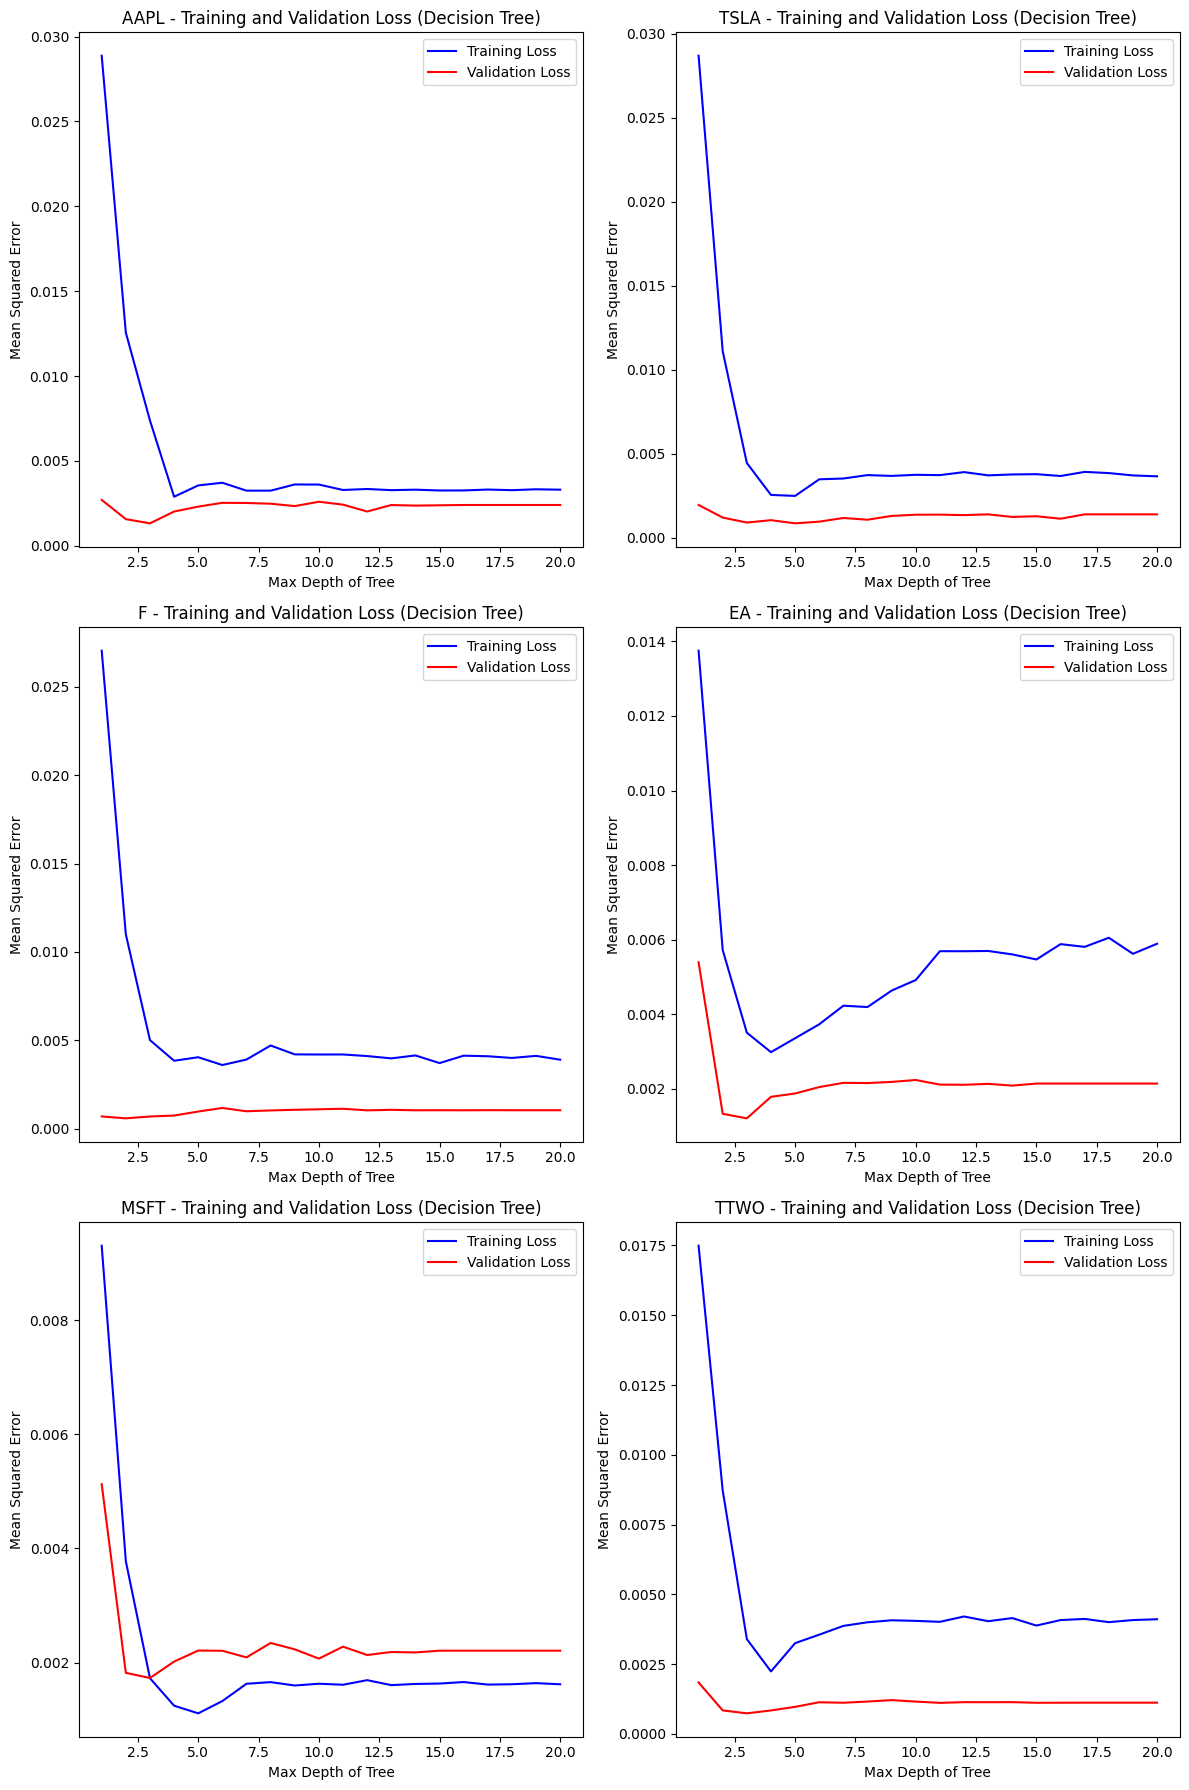

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử có số lượng ticker (có thể tính n từ results_dto)
n = len(results_dto)
rows = (n + 1) // 2  # Số hàng (nếu n là số lẻ thì thêm một hàng nữa)
cols = 2  # 2 cột

# Tạo subplots với số hàng và số cột
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 6))

# Đảm bảo axes là mảng 1 chiều nếu chỉ có 1 hàng
axes = axes.flatten()

# Lặp qua từng ticker để vẽ đồ thị
for idx, (ticker, result) in enumerate(results_dto.items()):
    train_loss = result['train_loss']
    test_loss = result['test_loss']
    
    ax = axes[idx]  # Chọn subplot tương ứng

    ax.plot(range(1, 21), train_loss, label='Training Loss', color='blue')
    ax.plot(range(1, 21), test_loss, label='Validation Loss', color='red')
    ax.set_xlabel('Max Depth of Tree')
    ax.set_ylabel('Mean Squared Error')
    ax.set_title(f'{ticker} - Training and Validation Loss (Decision Tree)')
    ax.legend()

# Thêm khoảng cách giữa các subplots
plt.tight_layout()
plt.show()

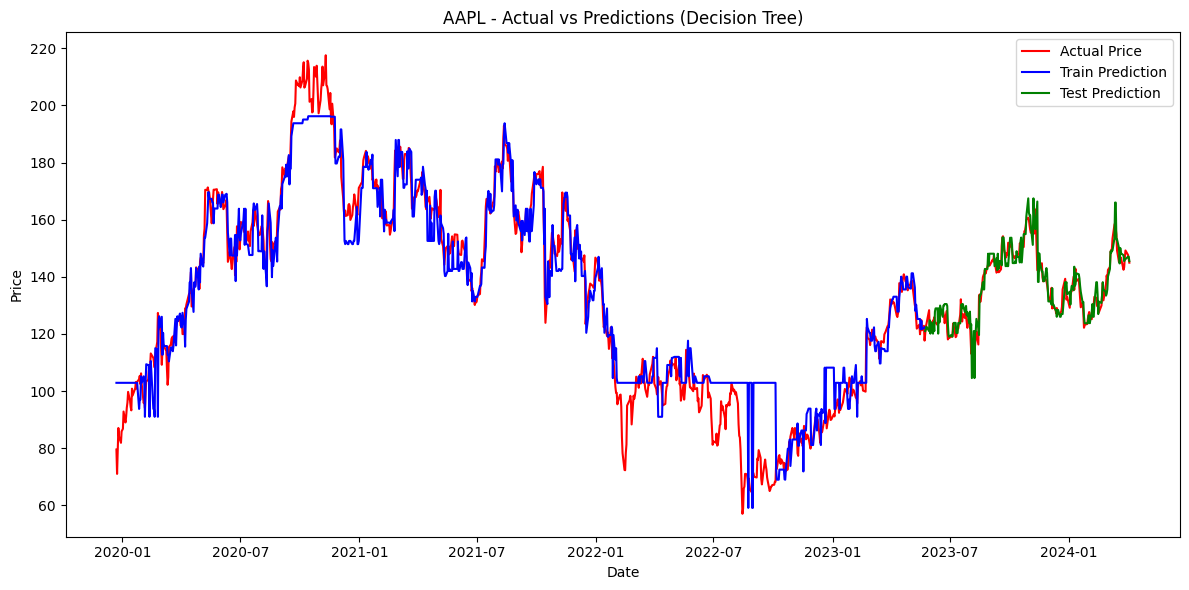

AAPL - MSE Train: 0.0, MSE Test: 35.410104542354134
AAPL - R² Train: 1.0, R² Test: 0.716350791981997


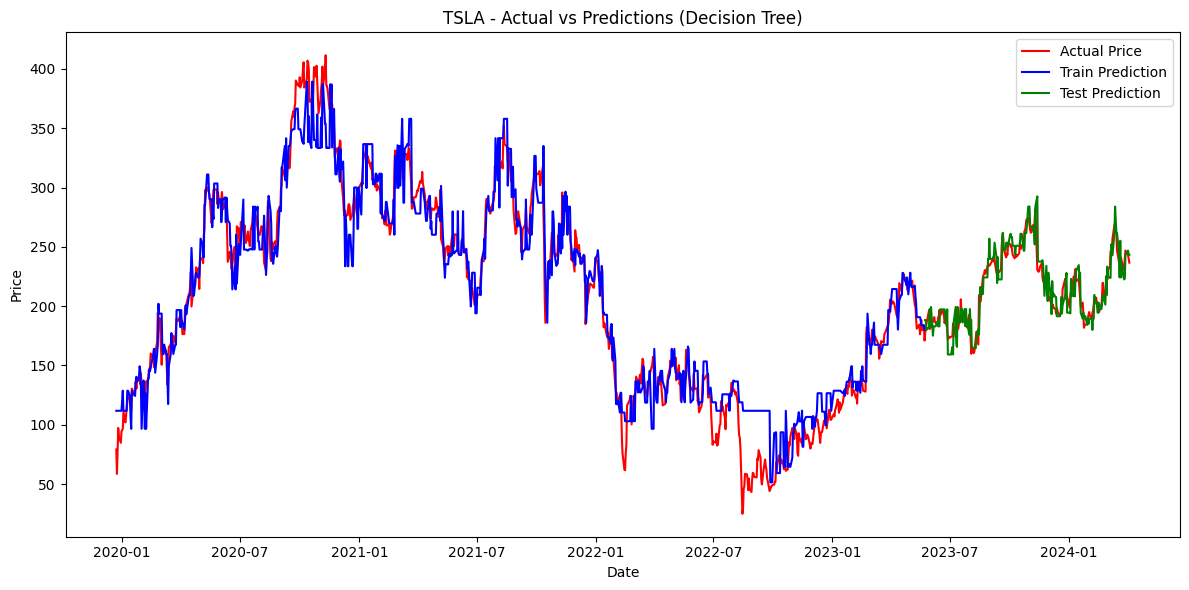

TSLA - MSE Train: 0.0, MSE Test: 140.84226123136366
TSLA - R² Train: 1.0, R² Test: 0.878098690995665


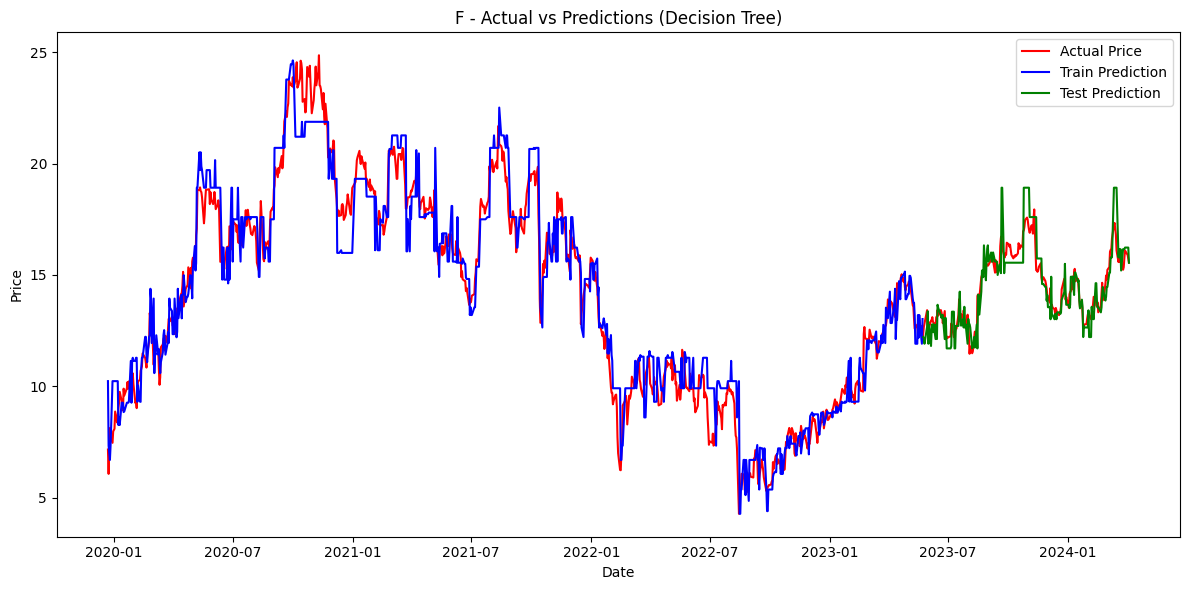

F - MSE Train: 0.0, MSE Test: 0.3172347370113709
F - R² Train: 1.0, R² Test: 0.5025460969794595


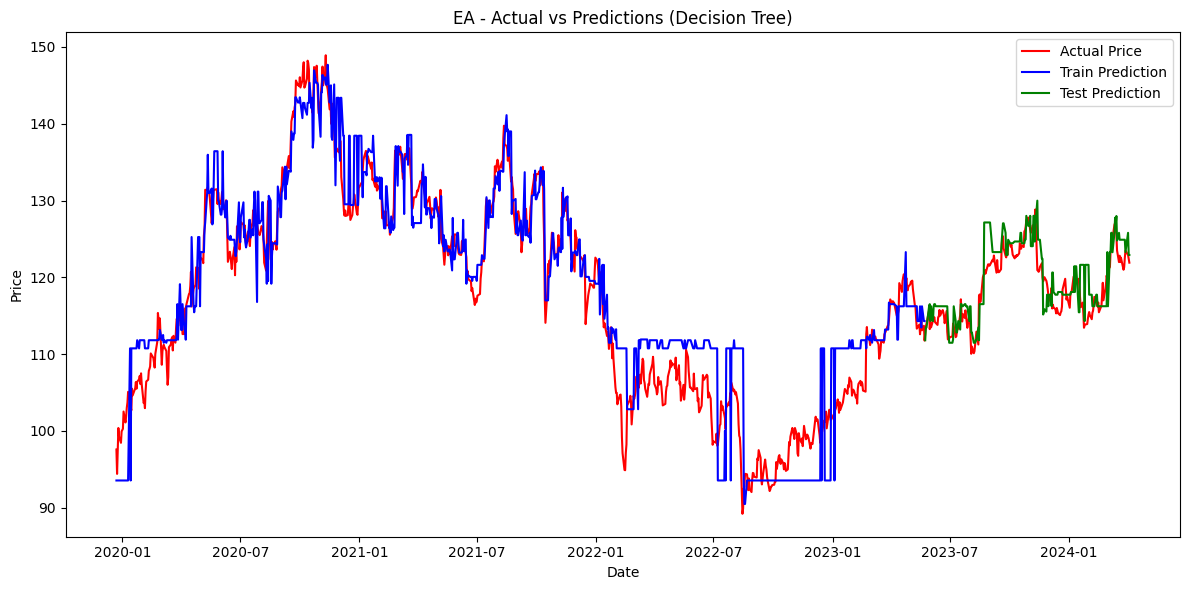

EA - MSE Train: 0.0, MSE Test: 7.027809157394115
EA - R² Train: 1.0, R² Test: 0.8447767647357747


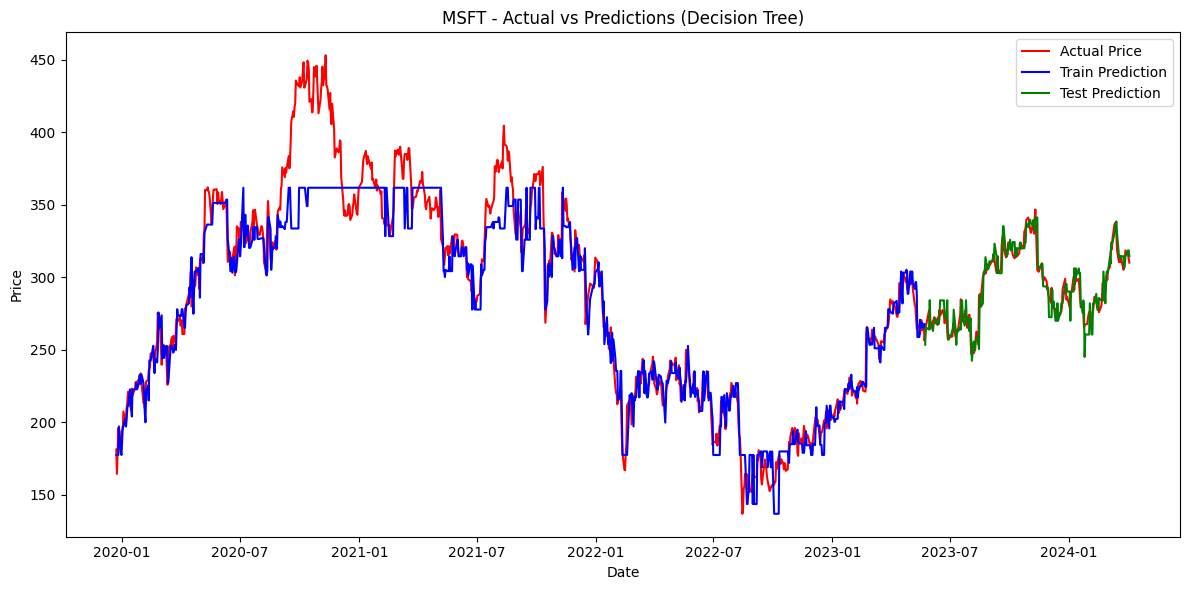

MSFT - MSE Train: 0.0, MSE Test: 1835.6085659554842
MSFT - R² Train: 1.0, R² Test: -0.22300365134633493


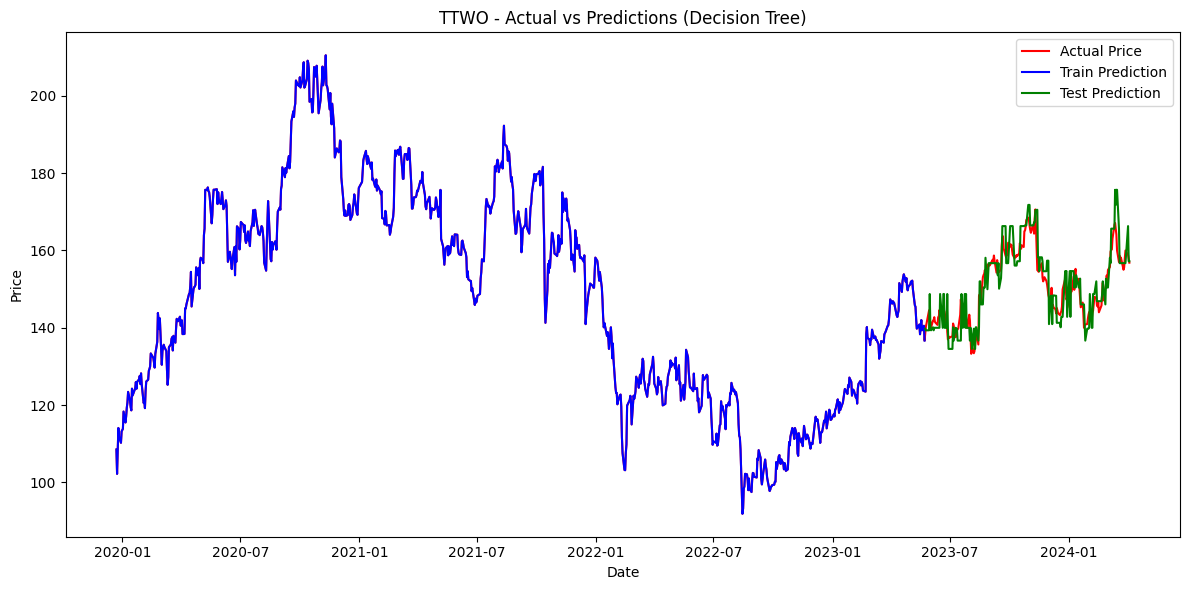

TTWO - MSE Train: 0.0, MSE Test: 17.84552003074916
TTWO - R² Train: 1.0, R² Test: 0.7700871255553803


In [49]:
for ticker, result in results_dto.items():
    # Lấy giá trị thực và giá trị dự đoán
    y_train_actual_dto = result['scaler'].inverse_transform(y_train_dto.reshape(-1, 1)).flatten()
    y_train_pred_dto = result['scaler'].inverse_transform(result['model'].predict(X_train_dto).flatten().reshape(-1, 1)).flatten()

    y_eval_actual_dto = result['scaler'].inverse_transform(y_eval_dto.reshape(-1, 1)).flatten()
    y_eval_pred_dto = result['scaler'].inverse_transform(result['model'].predict(X_eval_dto).flatten().reshape(-1, 1)).flatten()

    # Chia dữ liệu ngày tháng cho tập huấn luyện và kiểm tra
    train_dates_dto = ticker_data_dto['Date'].iloc[:len(y_train_actual_dto)].values
    test_dates_dto = ticker_data_dto['Date'].iloc[len(y_train_actual_dto):len(y_train_actual_dto) + len(y_eval_actual_dto)].values

    # Kết hợp dữ liệu thực tế
    actual_dates_dto = np.concatenate([train_dates_dto, test_dates_dto])
    actual_prices_dto = np.concatenate([y_train_actual_dto, y_eval_actual_dto])

    # Vẽ đồ thị giá trị thực tế và dự đoán
    plt.figure(figsize=(12, 6))
    plt.plot(actual_dates_dto, actual_prices_dto, color='red', label='Actual Price')
    plt.plot(train_dates_dto, y_train_pred_dto, color='blue', label='Train Prediction')
    plt.plot(test_dates_dto, y_eval_pred_dto, color='green', label='Test Prediction')
    plt.title(f'{ticker} - Actual vs Predictions (Decision Tree)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # In thông tin MSE và R²
    print(f"{ticker} - MSE Train: {result['mse_train_dto']}, MSE Test: {result['mse_test_dto']}")
    print(f"{ticker} - R² Train: {result['r2_train_dto']}, R² Test: {result['r2_test_dto']}")

SO SÁNH CÁC MÔ HÌNH KHI CHƯA OVERFITTING

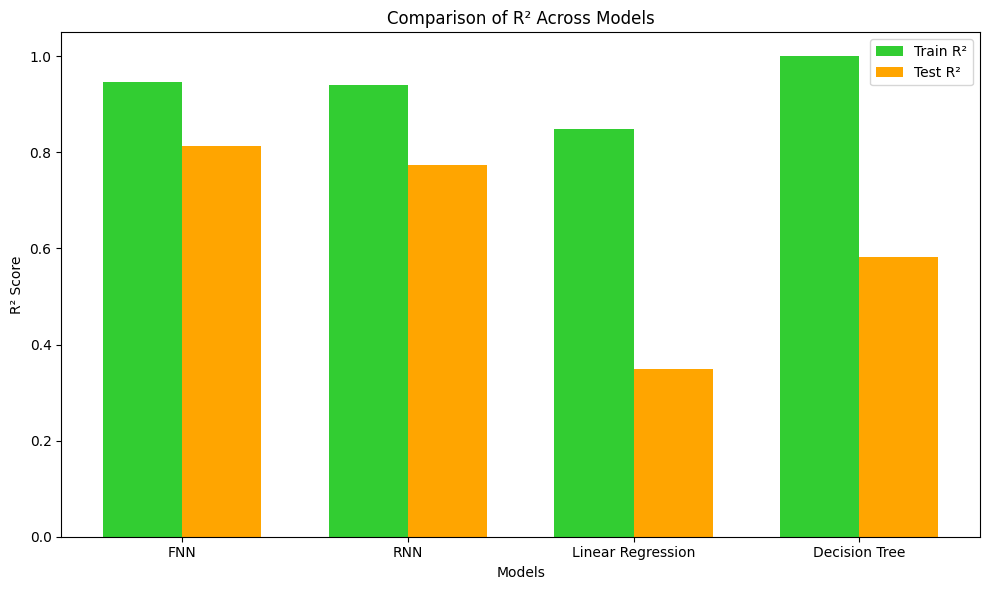

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các mô hình và các giá trị MSE, R²
models = ['FNN', 'RNN', 'Linear Regression', 'Decision Tree']
train_mse = [
    np.mean([results_fnn[ticker]['train_mse_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['train_mse_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['train_mse_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['train_mse_dt'] for ticker in tickers])
]
test_mse = [
    np.mean([results_fnn[ticker]['test_mse_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['test_mse_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['test_mse_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['test_mse_dt'] for ticker in tickers])
]
train_r2 = [
    np.mean([results_fnn[ticker]['train_r2_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['train_r2_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['train_r2_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['train_r2_dt'] for ticker in tickers])
]
test_r2 = [
    np.mean([results_fnn[ticker]['test_r2_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['test_r2_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['test_r2_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['test_r2_dt'] for ticker in tickers])
]

# Vẽ biểu đồ cột MSE
x = np.arange(len(models))  # Vị trí các cột
width = 0.35  # Độ rộng của mỗi cột

plt.figure(figsize=(10, 6))

# Train MSE
plt.bar(x - width/2, train_mse, width, label='Train MSE', color='skyblue')
# Test MSE
plt.bar(x + width/2, test_mse, width, label='Test MSE', color='salmon')

plt.title('Comparison of MSE Across Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột R²
plt.figure(figsize=(10, 6))

# Train R²
plt.bar(x - width/2, train_r2, width, label='Train R²', color='limegreen')
# Test R²
plt.bar(x + width/2, test_r2, width, label='Test R²', color='orange')

plt.title('Comparison of R² Across Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

SO SANH CÁC MÔ HÌNH SAU KHI OVERFITTING

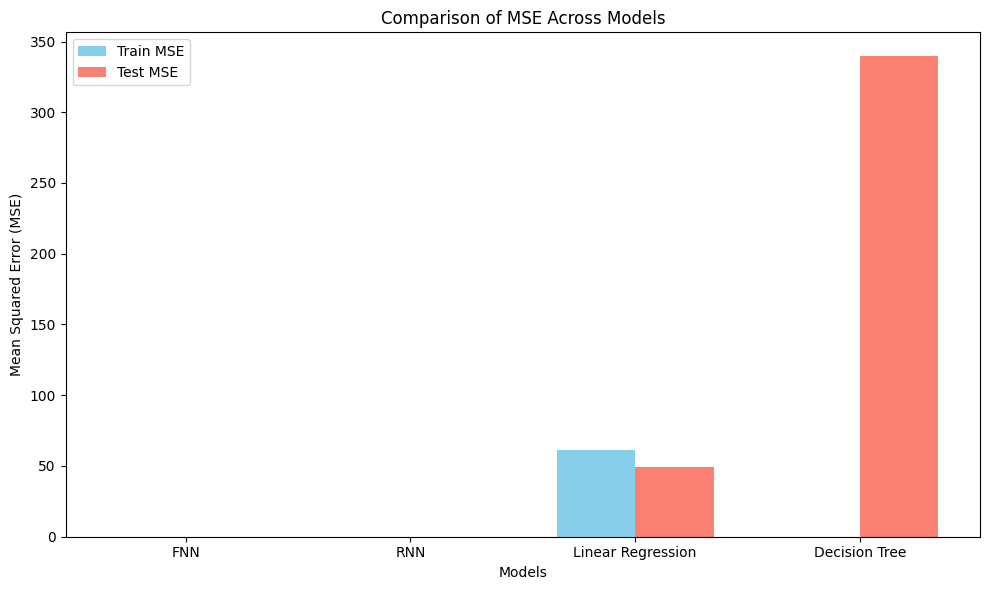

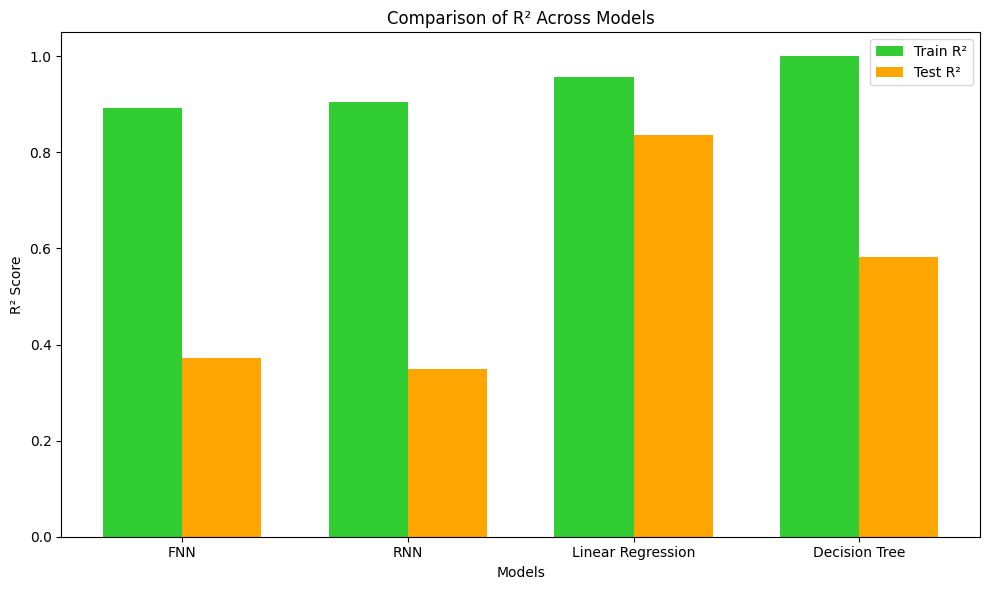

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các mô hình và các giá trị MSE, R²
models = ['FNN', 'RNN', 'Linear Regression', 'Decision Tree']
train_mse_o = [
    np.mean([results_fnno[ticker]['mse_train_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['mse_train_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['mse_train_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['mse_train_dto'] for ticker in tickers])
]
test_mse_o = [
    np.mean([results_fnno[ticker]['mse_test_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['mse_test_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['mse_test_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['mse_test_dto'] for ticker in tickers])
]
train_r2_o = [
    np.mean([results_fnno[ticker]['r2_train_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['r2_train_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['r2_train_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['r2_train_dto'] for ticker in tickers])
]
test_r2_o = [
    np.mean([results_fnno[ticker]['r2_test_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['r2_test_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['r2_test_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['r2_test_dto'] for ticker in tickers])
]

# Vẽ biểu đồ cột MSE
x = np.arange(len(models))  # Vị trí các cột
width = 0.35  # Độ rộng của mỗi cột

plt.figure(figsize=(10, 6))

# Train MSE
plt.bar(x - width/2, train_mse_o, width, label='Train MSE', color='skyblue')
# Test MSE
plt.bar(x + width/2, test_mse_o, width, label='Test MSE', color='salmon')

plt.title('Comparison of MSE Across Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột R²
plt.figure(figsize=(10, 6))

# Train R²
plt.bar(x - width/2, train_r2_o, width, label='Train R²', color='limegreen')
# Test R²
plt.bar(x + width/2, test_r2_o, width, label='Test R²', color='orange')

plt.title('Comparison of R² Across Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

ĐÁNH GIÁ CÁC MÔ HÌNH

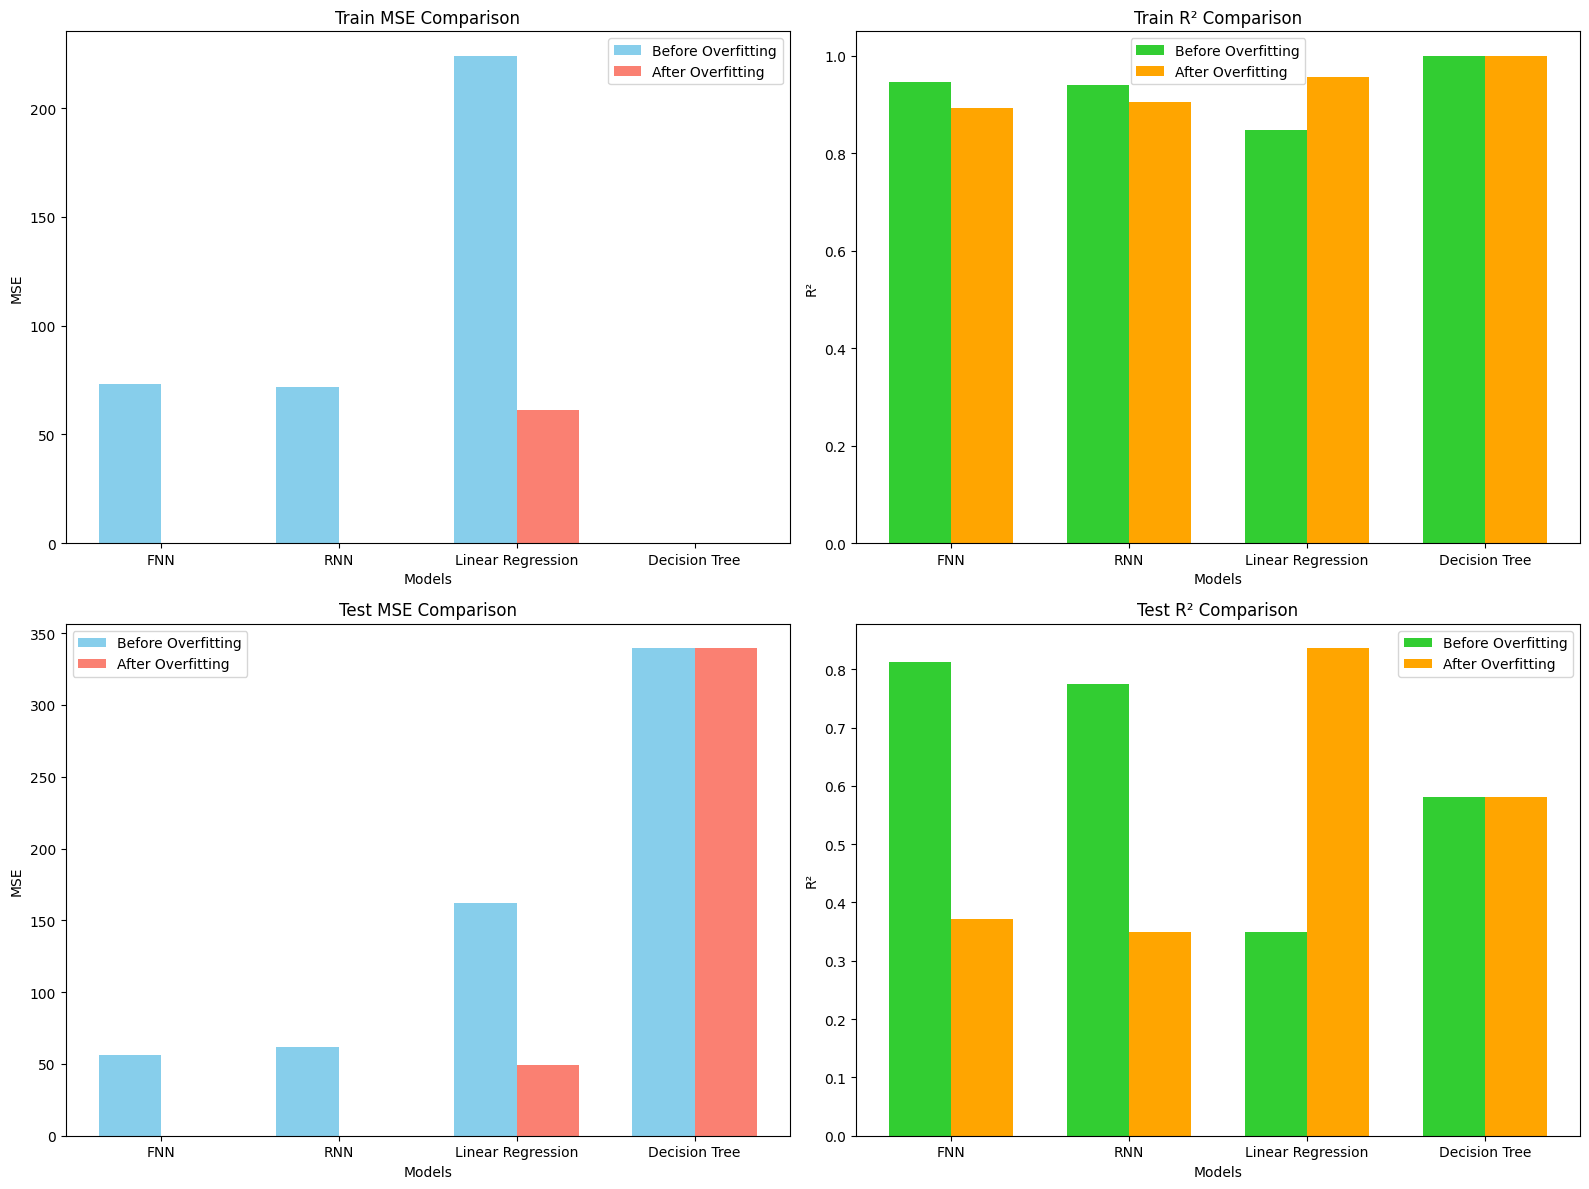

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo danh sách các mô hình và các giá trị trước và sau khi overfitting
models = ['FNN', 'RNN', 'Linear Regression', 'Decision Tree']
before_train_mse = [
    np.mean([results_fnn[ticker]['train_mse_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['train_mse_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['train_mse_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['train_mse_dt'] for ticker in tickers])
]
after_train_mse = [
    np.mean([results_fnno[ticker]['mse_train_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['mse_train_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['mse_train_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['mse_train_dto'] for ticker in tickers])
]
before_train_r2 = [
    np.mean([results_fnn[ticker]['train_r2_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['train_r2_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['train_r2_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['train_r2_dt'] for ticker in tickers])
]
after_train_r2 = [
    np.mean([results_fnno[ticker]['r2_train_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['r2_train_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['r2_train_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['r2_train_dto'] for ticker in tickers])
]
before_test_mse = [
    np.mean([results_fnn[ticker]['test_mse_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['test_mse_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['test_mse_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['test_mse_dt'] for ticker in tickers])
]
after_test_mse = [
    np.mean([results_fnno[ticker]['mse_test_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['mse_test_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['mse_test_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['mse_test_dto'] for ticker in tickers])
]
before_test_r2 = [
    np.mean([results_fnn[ticker]['test_r2_fnn'] for ticker in tickers]),
    np.mean([results_rnn[ticker]['test_r2_rnn'] for ticker in tickers]),
    np.mean([results_lr[ticker]['test_r2_lr'] for ticker in tickers]),
    np.mean([results_dt[ticker]['test_r2_dt'] for ticker in tickers])
]
after_test_r2 = [
    np.mean([results_fnno[ticker]['r2_test_fnno'] for ticker in tickers]),
    np.mean([results_rnno[ticker]['r2_test_rnno'] for ticker in tickers]),
    np.mean([results_lro[ticker]['r2_test_lro'] for ticker in tickers]),
    np.mean([results_dto[ticker]['r2_test_dto'] for ticker in tickers])
]

# Đặt vị trí các cột
x = np.arange(len(models))
width = 0.35

# Vẽ các biểu đồ
plt.figure(figsize=(16, 12))

# Biểu đồ Train MSE
plt.subplot(2, 2, 1)
plt.bar(x - width/2, before_train_mse, width, label='Before Overfitting', color='skyblue')
plt.bar(x + width/2, after_train_mse, width, label='After Overfitting', color='salmon')
plt.title('Train MSE Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(x, models)
plt.legend()

# Biểu đồ Train R²
plt.subplot(2, 2, 2)
plt.bar(x - width/2, before_train_r2, width, label='Before Overfitting', color='limegreen')
plt.bar(x + width/2, after_train_r2, width, label='After Overfitting', color='orange')
plt.title('Train R² Comparison')
plt.xlabel('Models')
plt.ylabel('R²')
plt.xticks(x, models)
plt.legend()

# Biểu đồ Test MSE
plt.subplot(2, 2, 3)
plt.bar(x - width/2, before_test_mse, width, label='Before Overfitting', color='skyblue')
plt.bar(x + width/2, after_test_mse, width, label='After Overfitting', color='salmon')
plt.title('Test MSE Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(x, models)
plt.legend()

# Biểu đồ Test R²
plt.subplot(2, 2, 4)
plt.bar(x - width/2, before_test_r2, width, label='Before Overfitting', color='limegreen')
plt.bar(x + width/2, after_test_r2, width, label='After Overfitting', color='orange')
plt.title('Test R² Comparison')
plt.xlabel('Models')
plt.ylabel('R²')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
# Tự động nhận xét dựa trên MSE và R²
for i, model in enumerate(models):
    print(f"\nModel: {model}")

    # Nhận xét Train MSE
    if after_train_mse[i] > before_train_mse[i]:
        print(f"- Train MSE tăng ({before_train_mse[i]} -> {after_train_mse[i]}): Hiện tượng overfitting xảy ra.")
    else:
        print(f"- Train MSE giảm ({before_train_mse[i]} -> {after_train_mse[i]}): Mô hình cải thiện trên tập huấn luyện.")

    # Nhận xét Train R²
    if after_train_r2[i] < before_train_r2[i]:
        print(f"- Train R² giảm ({before_train_r2[i]} -> {after_train_r2[i]}): Hiệu suất mô hình trên tập huấn luyện giảm.")
    else:
        print(f"- Train R² tăng ({before_train_r2[i]} -> {after_train_r2[i]}): Mô hình phù hợp hơn với tập huấn luyện.")

    # Nhận xét Test MSE
    if after_test_mse[i] > before_test_mse[i]:
        print(f"- Test MSE tăng ({before_test_mse[i]} -> {after_test_mse[i]}): Hiện tượng overfitting làm giảm hiệu suất trên tập kiểm tra.")
    else:
        print(f"- Test MSE giảm ({before_test_mse[i]} -> {after_test_mse[i]}): Mô hình tổng quát hóa tốt hơn trên tập kiểm tra.")

    # Nhận xét Test R²
    if after_test_r2[i] < before_test_r2[i]:
        print(f"- Test R² giảm ({before_test_r2[i]} -> {after_test_r2[i]}): Hiện tượng overfitting dẫn đến giảm hiệu quả dự đoán trên tập kiểm tra.")
    else:
        print(f"- Test R² tăng ({before_test_r2[i]} -> {after_test_r2[i]}): Mô hình dự đoán tốt hơn trên tập kiểm tra.")


Model: FNN
- Train MSE giảm (73.27059386013902 -> 0.0034292668988290943): Mô hình cải thiện trên tập huấn luyện.
- Train R² giảm (0.947078277896953 -> 0.8930545901312019): Hiệu suất mô hình trên tập huấn luyện giảm.
- Test MSE giảm (56.512526352206045 -> 0.004738079433545843): Mô hình tổng quát hóa tốt hơn trên tập kiểm tra.
- Test R² giảm (0.8128176386476015 -> 0.37224558464406754): Hiện tượng overfitting dẫn đến giảm hiệu quả dự đoán trên tập kiểm tra.

Model: RNN
- Train MSE giảm (71.8861201178434 -> 0.0031374316199750864): Mô hình cải thiện trên tập huấn luyện.
- Train R² giảm (0.9402493127039397 -> 0.9048842486617975): Hiệu suất mô hình trên tập huấn luyện giảm.
- Test MSE giảm (62.040073635136004 -> 0.006211909538428436): Mô hình tổng quát hóa tốt hơn trên tập kiểm tra.
- Test R² giảm (0.7744070783464719 -> 0.3499373051024029): Hiện tượng overfitting dẫn đến giảm hiệu quả dự đoán trên tập kiểm tra.

Model: Linear Regression
- Train MSE giảm (224.07545885821108 -> 61.429026129897